## 1) Data Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#Reading csv file into a dataframe.
df = pd.read_csv('weight_change_dataset.csv')
df

Participant ID  Age Gender  BMR (Calories)  Daily Calories Consumed  \
0                 0   56      M         3102.30                  3916.00   
1                 1   46      M         2275.50                  3823.00   
2                 2   32      M         2119.40                  2785.40   
3                 3   25      M         2181.30                  2587.30   
4                 4   38      M         2463.80                  3312.80   
..              ...  ...    ...             ...                      ...   
595             595   39      F         2526.30                      NaN   
596             596   41      F         2699.57                  3546.90   
597             597   39      -         2651.40                  3393.60   
598             598   41      F         2230.70                  3442.70   
599             599   46      F         2449.67                  3277.53   

     Daily Caloric Surplus/Deficit  Weight Change (lbs)  Duration (weeks)  \
0                              NaN                14.57                 1   
1                          1547.50                  NaN                 6   
2                           666.00                  NaN                 7   
3                           406.00                 3.37                 8   
4                           849.00                 3.90                10   
..                             ...                  ...               ...   
595                        1030.97               -12.84                 4   
596                         847.33                 4.58                 8   
597                         742.20                -7.53                 9   
598                            NaN                 4.61                 6   
599                         827.93                -8.32                 3   

    Smoking Physical Activity Level Sleep Quality  Stress Level  \
0         -               Sedentary     Excellent             6   
1         -             Very Active     Excellent             6   
2       Yes               Sedentary          Good             3   
3         -               Sedentary          Fair             2   
4         -          Lightly Active          Good             1   
..      ...                     ...           ...           ...   
595       -          Lightly Active          Good             5   
596       -       Moderately Active          Good             6   
597       -          Lightly Active          Fair             5   
598       -          Lightly Active          Fair             4   
599       -          Lightly Active          Good             3   

       Work Sector  Final Weight (lbs)  
0           Public              228.60  
1           Public              167.80  
2    Self-Employed              144.20  
3          Private              146.30  
4       Unemployed              157.50  
..             ...                 ...  
595     Unemployed              166.73  
596         Public              188.03  
597        Private              189.50  
598  Self-Employed              159.03  
599         Public              165.00  

[600 rows x 14 columns]

In [3]:

print(df['Smoking'].unique())
print(df['Sleep Quality'].unique())
print(df['Gender'].unique())
print(df['Physical Activity Level'].unique())
print(df['Work Sector'].unique())

['-' 'Yes']
['Excellent' 'Good' 'Fair' 'Poor' 'Very Good']
['M' '-' 'F']
['Sedentary' 'Very Active' 'Lightly Active' 'Moderately Active']
['Public' 'Self-Employed' 'Private' 'Unemployed' nan]


In [4]:
df['Smoking']= df['Smoking'].replace('-', 'No')


In [5]:
df['Gender'] = df['Gender'].replace('-', np.nan)

In [6]:
# Filling missing values for categorical column with 'Unknown'
df['Work Sector'] = df['Work Sector'].fillna('Unknown')


I replace ambiguous values to simplificate my preprocessing process.

Smoking is a binary factor. Having only 'Yes' as the only clear indicator, leads to the conclusion that '-' indicates the participant to not being a smoker, instead of not being sure if its one or not. 

Different is the case for Gender, since we do have at least 2 binary values. Thus, we can't assume '-' being one or the other.

Work Sector would need to be encoded with One-Hot eventually, so it would be easier to assign an arbitrary categorical value instead of using imputation algorithms to try to predict. Unlike gender or physiological factors, which can significantly influence health-related outcomes, work sector might have less direct relevance. Thus, assigning a generic label like 'Unknown' is less likely to introduce bias 

In [7]:
df.describe()

Participant ID         Age  BMR (Calories)  Daily Calories Consumed  \
count      600.000000  600.000000      600.000000               544.000000   
mean       299.500000   40.633333     2507.488800              3489.047224   
std        173.349358   26.724256      245.662118               351.436429   
min          0.000000  -17.000000     1566.500000              2030.900000   
25%        149.750000   32.750000     2343.990000              3279.757500   
50%        299.500000   38.000000     2515.620000              3530.750000   
75%        449.250000   43.000000     2674.585000              3742.855000   
max        599.000000  207.000000     3390.800000              4000.000000   

       Daily Caloric Surplus/Deficit  Weight Change (lbs)  Duration (weeks)  \
count                     540.000000           544.000000        600.000000   
mean                      981.939611            -2.750533          6.665000   
std                       250.527087             6.934349          2.315537   
min                        82.500000           -42.990000          1.000000   
25%                       817.367500            -6.425000          5.000000   
50%                       979.700000            -2.305000          7.000000   
75%                      1142.392500             1.475000          8.000000   
max                      1922.500000            18.140000         12.000000   

       Stress Level  Final Weight (lbs)  
count    600.000000          600.000000  
mean       4.716667          168.341300  
std        1.677621           20.273139  
min        1.000000           98.200000  
25%        4.000000          156.580000  
50%        5.000000          168.950000  
75%        6.000000          180.947500  
max        9.000000          232.500000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant ID                 600 non-null    int64  
 1   Age                            600 non-null    int64  
 2   Gender                         540 non-null    object 
 3   BMR (Calories)                 600 non-null    float64
 4   Daily Calories Consumed        544 non-null    float64
 5   Daily Caloric Surplus/Deficit  540 non-null    float64
 6   Weight Change (lbs)            544 non-null    float64
 7   Duration (weeks)               600 non-null    int64  
 8   Smoking                        600 non-null    object 
 9   Physical Activity Level        600 non-null    object 
 10  Sleep Quality                  600 non-null    object 
 11  Stress Level                   600 non-null    int64  
 12  Work Sector                    600 non-null    obj

In [9]:
# Count of the duplicated values by marking all the duplicate values as TRUE.
df.duplicated(keep=False).value_counts()

False    600
Name: count, dtype: int64

In [10]:
# Percentage of missing values (mean of boolean mask)
df.isnull().sum()

Participant ID                    0
Age                               0
Gender                           60
BMR (Calories)                    0
Daily Calories Consumed          56
Daily Caloric Surplus/Deficit    60
Weight Change (lbs)              56
Duration (weeks)                  0
Smoking                           0
Physical Activity Level           0
Sleep Quality                     0
Stress Level                      0
Work Sector                       0
Final Weight (lbs)                0
dtype: int64

In [11]:

# Fill missing values for "Daily Caloric Surplus/Deficit" based on BMR and Daily Calories Consumed
df['Daily Caloric Surplus/Deficit'] = df.apply(
    lambda row: row['Daily Calories Consumed'] - row['BMR (Calories)'] 
    if pd.isnull(row['Daily Caloric Surplus/Deficit']) 
    else row['Daily Caloric Surplus/Deficit'], 
    axis=1
)

#after imputation
print("\nMissing values after imputation:")
print(df[['BMR (Calories)', 'Daily Calories Consumed', 'Daily Caloric Surplus/Deficit']].isnull().sum())



Missing values after imputation:
BMR (Calories)                    0
Daily Calories Consumed          56
Daily Caloric Surplus/Deficit     9
dtype: int64


"Daily Caloric Surplus/Deficit: The difference between calories consumed
and BMR, indicating whether the participant is in a caloric surplus or deficit (during the diet period)."

This is the definition given by the pdf file. We have then a sure-way to replace for some missing values of that feature with the correct and exact value instead of using imputation algorithms. Luckily, only 9 missing values remain instead of 60.


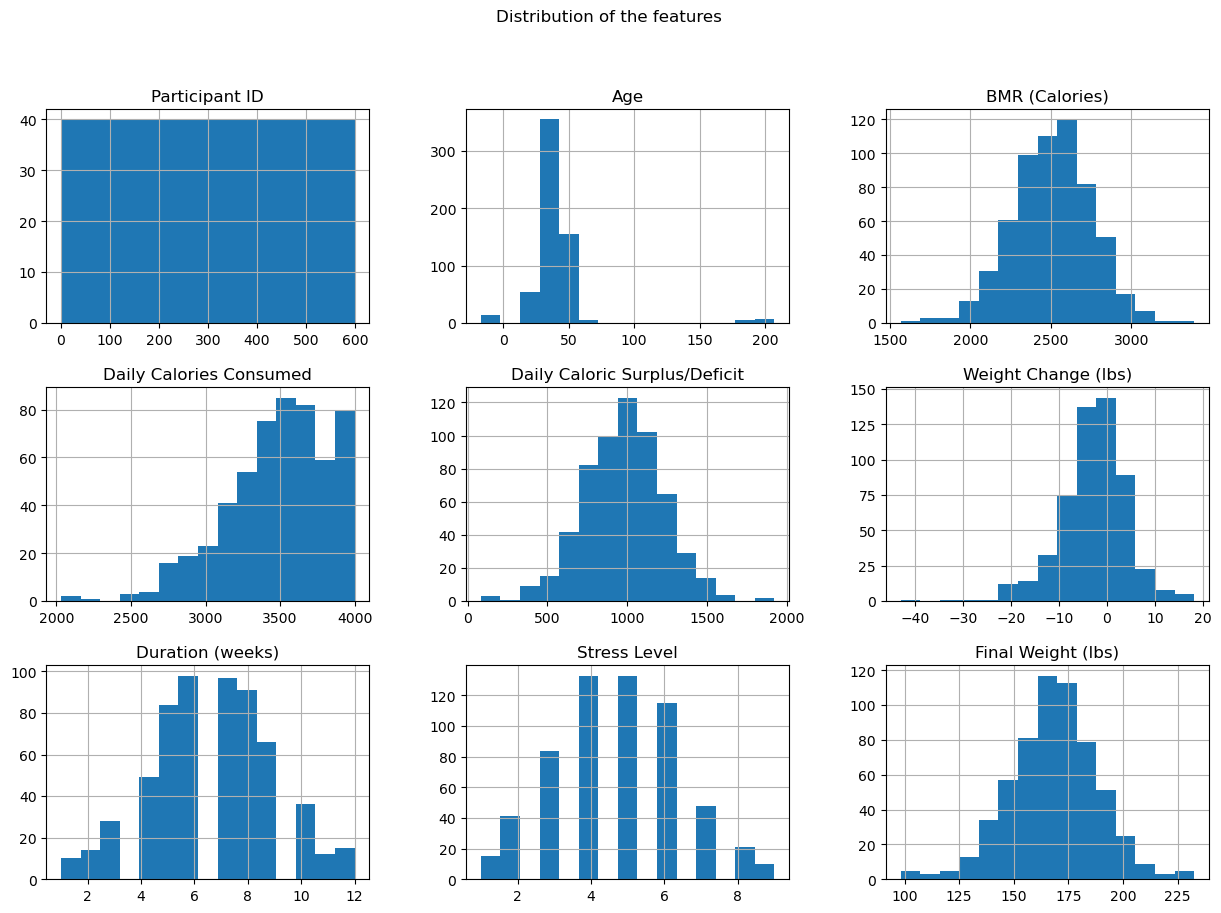

In [12]:
#this was asked for point a) of the second task, too


df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of the features')
plt.show()




I observe the distributions immediately to make sure of:

Dropping Unnecessary Features: ID doesn't really help for the analysis since dataframes are already indexed 

Handling Skewness and outliers: Consider possible transformations (e.g. for Daily Calories Consumed) if skewness impacts model performance, though this should be tested experimentally.

Scaling: Since the features vary widely in range, scaling will be necessary. 

Finding Noises : i can see that Age has impossible values. Other than the negative values and the absurdly high ages, there doesn't seem to be improbable values (like infants that underwent a period of diet)


In [13]:
df = df.drop('Participant ID', axis=1)


In [14]:
# Removing rows with unrealistic ages
df = df[(df['Age'] >= 3) & (df['Age'] <= 120)]


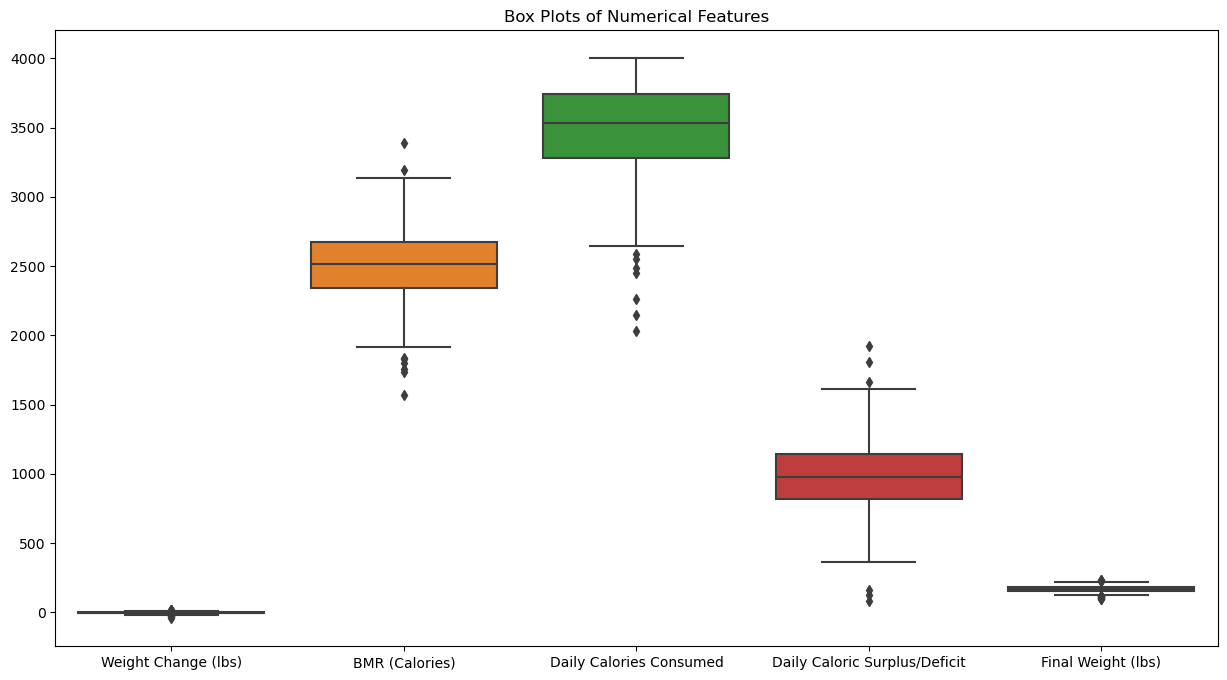

In [15]:
# Box plots for numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['Weight Change (lbs)', 'BMR (Calories)', 'Daily Calories Consumed', 'Daily Caloric Surplus/Deficit', 'Final Weight (lbs)']])
plt.title('Box Plots of Numerical Features')
plt.show()

I focused on these particular features since, from the distribution, they were the potential ones that could have outliers that could impact greatly the analysis of the dataset. Each of these features shows some level of outliers (points beyond the whiskers).

I chose to not remove those outliers (for now) because, in weight-related data, people who are very different from the average (like those with high or low calorie intake) still give useful info. Removing these could reduce the model’s ability to generalize well to diverse individuals, as these variations are relevant for understanding the full scope of weight change patterns. , and it can bias the model to ignore extreme yet valid cases.

I would consider removing them later if the skewness is excessive even after scaling.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 599
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            570 non-null    int64  
 1   Gender                         514 non-null    object 
 2   BMR (Calories)                 570 non-null    float64
 3   Daily Calories Consumed        516 non-null    float64
 4   Daily Caloric Surplus/Deficit  561 non-null    float64
 5   Weight Change (lbs)            520 non-null    float64
 6   Duration (weeks)               570 non-null    int64  
 7   Smoking                        570 non-null    object 
 8   Physical Activity Level        570 non-null    object 
 9   Sleep Quality                  570 non-null    object 
 10  Stress Level                   570 non-null    int64  
 11  Work Sector                    570 non-null    object 
 12  Final Weight (lbs)             570 non-null    float64


Age                              0.00
Gender                           9.82
BMR (Calories)                   0.00
Daily Calories Consumed          9.47
Daily Caloric Surplus/Deficit    1.58
Weight Change (lbs)              8.77
Duration (weeks)                 0.00
Smoking                          0.00
Physical Activity Level          0.00
Sleep Quality                    0.00
Stress Level                     0.00
Work Sector                      0.00
Final Weight (lbs)               0.00
dtype: float64


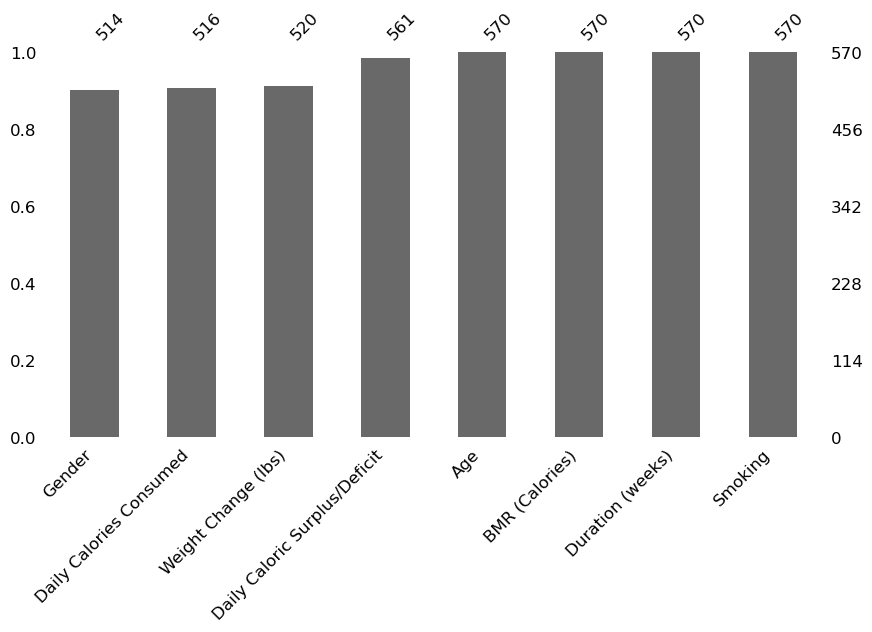

In [17]:
print(df.isnull().mean().round(4)*100)
missingno.bar(df.iloc[:,:8], sort="ascending", figsize=(10,5), fontsize=12);

The missing values for those type of features is understandable considering that there can be cases where the analysis can be uncertain or even uncountable, be the reason the neglicence of the patients or miscalculations of the machines. 
While just 10% of those features is missing from each associated column (except daily caloric surplus/deficit), the dataset is not really that huge, so i can't afford a loss like that (and Gender is critical later)

Filling missing values based on similarities with other features can yield more accurate imputation than using the median across all entries. Thus we will use KNN or a Regression-based one. 




In [18]:
# Encode Gender as 0 for female and 1 for male
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

In [19]:
df.head()

Age  Gender  BMR (Calories)  Daily Calories Consumed  \
0   56     1.0          3102.3                   3916.0   
1   46     1.0          2275.5                   3823.0   
2   32     1.0          2119.4                   2785.4   
3   25     1.0          2181.3                   2587.3   
4   38     1.0          2463.8                   3312.8   

   Daily Caloric Surplus/Deficit  Weight Change (lbs)  Duration (weeks)  \
0                          813.7                14.57                 1   
1                         1547.5                  NaN                 6   
2                          666.0                  NaN                 7   
3                          406.0                 3.37                 8   
4                          849.0                 3.90                10   

  Smoking Physical Activity Level Sleep Quality  Stress Level    Work Sector  \
0      No               Sedentary     Excellent             6         Public   
1      No             Very Active     Excellent             6         Public   
2     Yes               Sedentary          Good             3  Self-Employed   
3      No               Sedentary          Fair             2        Private   
4      No          Lightly Active          Good             1     Unemployed   

   Final Weight (lbs)  
0               228.6  
1               167.8  
2               144.2  
3               146.3  
4               157.5

Normally, I would have replaced the missing value of Gender with Unknown, but considering that for the later tasks we will have to predict based on gender, i have to use an imputation algorithm to replace them.

In [20]:
df_original = df.copy()
df_original_2 = df.copy()

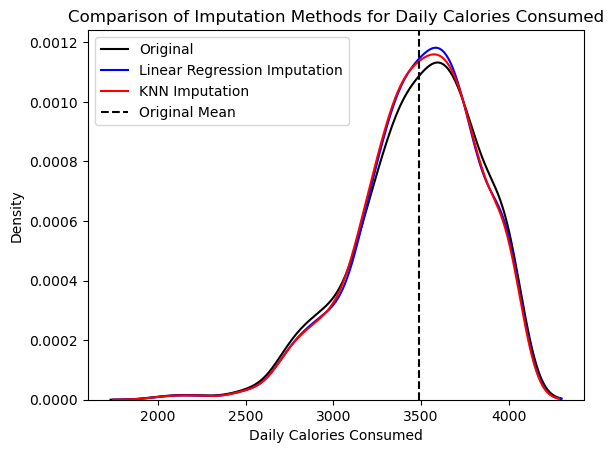

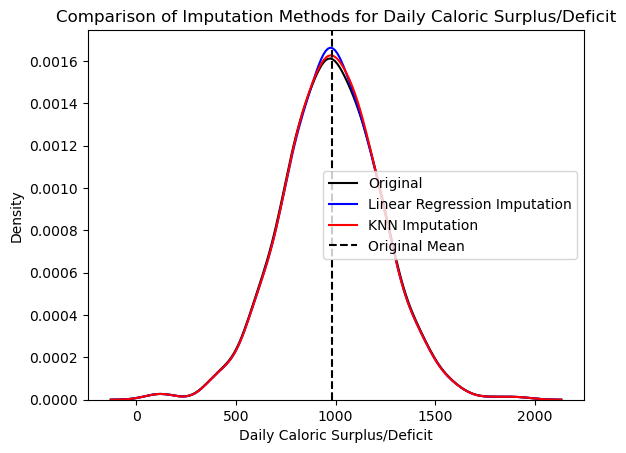

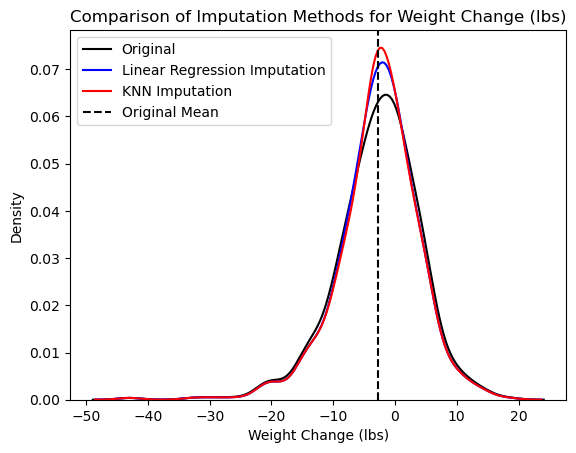

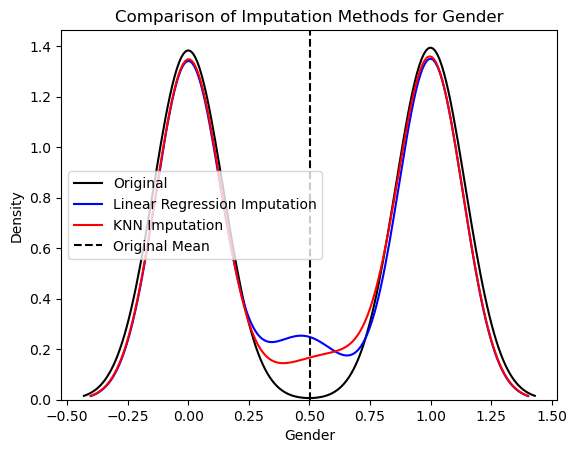

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer


# Columns to impute
target_columns = ['Daily Calories Consumed', 'Daily Caloric Surplus/Deficit', 'Weight Change (lbs)', 'Gender']

# Initialize the Linear Regression model and the KNN imputer
lr_model = LinearRegression()
knn_imputer = KNNImputer(n_neighbors=5)

# Copy the original DataFrame for KNN imputation
df_knn_imputed = df.copy()
# Perform KNN imputation for each target column
df_knn_imputed[target_columns] = knn_imputer.fit_transform(df_knn_imputed[target_columns])

# Initialize a DataFrame for Linear Regression Imputation
df_regr = df_original_2[['Age', 'Duration (weeks)', 'Stress Level', 'Final Weight (lbs)'] + target_columns].copy()

# Loop through each target column to impute missing values and plot KDEs
for target in target_columns:
    # Calculate the original mean for plotting
    original_mean = df[target].mean()

    # Prepare training and test data for linear regression imputation
    train_data = df_regr[df_regr[target].notnull()]
    test_data = df_regr[df_regr[target].isnull()]

    # Skip if no training data
    if train_data.empty:
        print(f"Not enough data for training {target}.")
        continue

    y = train_data[target]  # target column for imputation
    X_train = train_data.drop(columns=target_columns)  # features for training

    # Fit the linear regression model
    lr_model.fit(X_train, y)

    # Check if test data is empty
    if not test_data.empty:
        X_test = test_data.drop(columns=target_columns)  # features for prediction
        pred = lr_model.predict(X_test)
        df_regr.loc[df_regr[target].isnull(), target] = pred

    # Plot KDE for original data
    sns.kdeplot(df[target].dropna(), color='black', label='Original', fill=False)

    # Plot KDE for Linear Regression Imputation
    sns.kdeplot(df_regr[target], color='blue', label='Linear Regression Imputation', fill=False)

    # Plot KDE for KNN Imputation
    sns.kdeplot(df_knn_imputed[target], color='red', label='KNN Imputation', fill=False)

    # Add vertical line for the original mean
    plt.axvline(original_mean, color='black', linestyle='--', label='Original Mean')

    # Add title and labels for each column
    plt.title(f'Comparison of Imputation Methods for {target}')
    plt.xlabel(target)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


There doesn't really seem to be a meaningful difference between regression method and KNN here, since both of them preserve the shape of the original distributions, on top of maintaining the same mean.

In [22]:
# List of target columns with missing values
target_columns = ['Daily Calories Consumed', 'Daily Caloric Surplus/Deficit', 'Weight Change (lbs)', 'Gender']

# Update the missing values in the original DataFrame (df) from df_regr
for column in target_columns:
    # Only replace NaN values in df with values from df_regr
    df.loc[df[column].isnull(), column] = df_regr[column]

# Check if the values have been updated
df.head()


Age  Gender  BMR (Calories)  Daily Calories Consumed  \
0   56     1.0          3102.3                   3916.0   
1   46     1.0          2275.5                   3823.0   
2   32     1.0          2119.4                   2785.4   
3   25     1.0          2181.3                   2587.3   
4   38     1.0          2463.8                   3312.8   

   Daily Caloric Surplus/Deficit  Weight Change (lbs)  Duration (weeks)  \
0                          813.7            14.570000                 1   
1                         1547.5            -3.749026                 6   
2                          666.0            -0.936668                 7   
3                          406.0             3.370000                 8   
4                          849.0             3.900000                10   

  Smoking Physical Activity Level Sleep Quality  Stress Level    Work Sector  \
0      No               Sedentary     Excellent             6         Public   
1      No             Very Active     Excellent             6         Public   
2     Yes               Sedentary          Good             3  Self-Employed   
3      No               Sedentary          Fair             2        Private   
4      No          Lightly Active          Good             1     Unemployed   

   Final Weight (lbs)  
0               228.6  
1               167.8  
2               144.2  
3               146.3  
4               157.5

In [23]:
df['Gender'].unique()

array([1.        , 0.67131607, 0.39596564, 0.29894331, 0.43998741,
       0.45113377, 0.34484337, 0.62947087, 0.47292489, 0.50829015,
       0.44024492, 0.30435239, 0.51773681, 0.58681754, 0.58168919,
       0.49886706, 0.52511089, 0.59820133, 0.50494628, 0.57733771,
       0.35360866, 0.48258332, 0.45232947, 0.40670968, 0.49939297,
       0.48852738, 0.50644653, 0.46578727, 0.50229127, 0.50228652,
       0.        , 0.50388579, 0.44110098, 0.40469357, 0.50431425,
       0.51629831, 0.41657453, 0.45219148, 0.44248755, 0.58393236,
       0.31069454, 0.59055766, 0.53663346, 0.44543933, 0.51000976,
       0.47792802, 0.41275654, 0.41850435, 0.43927226, 0.56415862,
       0.36053825, 0.47133356, 0.41470801, 0.58867689, 0.44334951,
       0.35064976, 0.419466  , 0.419268  ])

In [24]:
# Convert values to binary (e.g., anything >= 0.5 is 1, else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x >= 0.5 else 0)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 599
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            570 non-null    int64  
 1   Gender                         570 non-null    int64  
 2   BMR (Calories)                 570 non-null    float64
 3   Daily Calories Consumed        570 non-null    float64
 4   Daily Caloric Surplus/Deficit  570 non-null    float64
 5   Weight Change (lbs)            570 non-null    float64
 6   Duration (weeks)               570 non-null    int64  
 7   Smoking                        570 non-null    object 
 8   Physical Activity Level        570 non-null    object 
 9   Sleep Quality                  570 non-null    object 
 10  Stress Level                   570 non-null    int64  
 11  Work Sector                    570 non-null    object 
 12  Final Weight (lbs)             570 non-null    float64


# 2. Preparing the dataset for a Linear Regression task that aims to build a "Final Weight (lbs)" predictive model

## 2a) Verify the feature values distribution of the numerical variables.

In [26]:
numerical_features = ['Age', 'BMR (Calories)', 'Daily Calories Consumed', 
                      'Daily Caloric Surplus/Deficit', 'Weight Change (lbs)', 
                      'Final Weight (lbs)']



from scipy.stats import skew

skew_values = df[numerical_features].skew()
print(skew_values)

Age                              0.068689
BMR (Calories)                  -0.149361
Daily Calories Consumed         -0.724568
Daily Caloric Surplus/Deficit   -0.028139
Weight Change (lbs)             -0.879236
Final Weight (lbs)              -0.195781
dtype: float64


This is seen in cell n.10 too, but Daily Calories and Weight Change are left-skewed, and for each feature the ranges are very different, so its advisable to scale them for a linear regression.


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.25, random_state=42)

df_train = pd.DataFrame(X_train.copy(),columns=df.columns)
df_test = pd.DataFrame(X_test.copy(),columns=df.columns)
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [28]:
df_train.head()

Age  Gender  BMR (Calories)  Daily Calories Consumed  \
0   35       0         2304.30                  3424.80   
1   23       1         2831.30                  3710.53   
2   44       0         2289.83                  3318.43   
3   38       1         2454.27                  3347.93   
4   40       0         2219.33                  3272.37   

   Daily Caloric Surplus/Deficit  Weight Change (lbs)  Duration (weeks)  \
0                        1120.50                -5.65                 5   
1                         879.20                -2.03                 7   
2                        1028.63                 3.32                10   
3                         893.67                -2.66                 4   
4                        1053.03                -1.41                10   

  Smoking Physical Activity Level Sleep Quality  Stress Level    Work Sector  \
0      No          Lightly Active     Excellent             5  Self-Employed   
1      No               Sedentary          Fair             4        Unknown   
2      No          Lightly Active          Fair             5  Self-Employed   
3      No          Lightly Active          Fair             5        Private   
4      No       Moderately Active          Fair             4  Self-Employed   

   Final Weight (lbs)  
0              139.60  
1              192.53  
2              156.07  
3              169.13  
4              150.17

In [29]:
df_test.head()

Age  Gender  BMR (Calories)  Daily Calories Consumed  \
0   45       0         2191.03               3252.29925   
1   25       1         2548.80               3737.87000   
2   35       1         2472.23               3384.20000   
3   42       0         2447.27               4000.00000   
4   55       0         2356.70               3216.20000   

   Daily Caloric Surplus/Deficit  Weight Change (lbs)  Duration (weeks)  \
0                    1052.769519                -6.16                10   
1                    1189.070000                 3.19                 9   
2                     912.030000                -6.97                 7   
3                    1552.730000                 1.78                 6   
4                     859.530000                -4.24                 9   

  Smoking Physical Activity Level Sleep Quality  Stress Level Work Sector  \
0      No       Moderately Active          Fair             6  Unemployed   
1     Yes       Moderately Active          Fair             4      Public   
2      No          Lightly Active          Poor             4  Unemployed   
3      No             Very Active          Good             6      Public   
4      No          Lightly Active          Fair             4  Unemployed   

   Final Weight (lbs)  
0              141.37  
1              175.50  
2              164.70  
3              164.83  
4              157.83

In [30]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
# Label Encoding for binary variables (Gender, Smoking)
le = LabelEncoder()

# Label Encode Smoking 
le.fit(pd.concat([df_train['Smoking'], df_test['Smoking']]))
df_train['Smoking'] = le.transform(df_train['Smoking'])
df_test['Smoking'] = le.transform(df_test['Smoking'])

# Ordinal Encoding for ordinal variables (Physical Activity Level, Sleep Quality)
activity_order = ['Sedentary', 'Lightly Active', 'Moderately Active', 'Very Active']
oe_activity = OrdinalEncoder(categories=[activity_order])
df_train['Physical Activity Level'] = oe_activity.fit_transform(df_train[['Physical Activity Level']]).ravel()
df_test['Physical Activity Level'] = oe_activity.transform(df_test[['Physical Activity Level']]).ravel()

sleep_order = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
oe_sleep = OrdinalEncoder(categories=[sleep_order])
df_train['Sleep Quality'] = oe_sleep.fit_transform(df_train[['Sleep Quality']]).ravel()
df_test['Sleep Quality'] = oe_sleep.transform(df_test[['Sleep Quality']]).ravel()

# One-Hot Encoding for Work Sector (nominal variable)
df_train = pd.get_dummies(df_train, columns=['Work Sector'], prefix='Work')
df_test = pd.get_dummies(df_test, columns=['Work Sector'], prefix='Work')

## 2b) features transformation for the numerical variables

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Define the numeric features to scale
numeric_features = ['Age', 'BMR (Calories)', 'Daily Calories Consumed',
                   'Daily Caloric Surplus/Deficit', 'Weight Change (lbs)',
                   'Duration (weeks)', 'Sleep Quality', 'Stress Level', 'Physical Activity Level']

# Initialize the scaler
scaler = StandardScaler()
#scaler = RobustScaler()

# Fit the scaler on the training data and apply it to both train and test
df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])
df_test[numeric_features] = scaler.transform(df_test[numeric_features])



In [32]:
df_test.head()

Age  Gender  BMR (Calories)  Daily Calories Consumed  \
0  0.842399       0       -1.252952                -0.683112   
1 -1.638320       1        0.173531                 0.723196   
2 -0.397961       1       -0.131765                -0.301101   
3  0.470291       0       -0.231284                 1.482376   
4  2.082758       0       -0.592400                -0.787662   

   Daily Caloric Surplus/Deficit  Weight Change (lbs)  Duration (weeks)  \
0                       0.278083            -0.452184          1.400422   
1                       0.825083             0.910908          0.982546   
2                      -0.286732            -0.570270          0.146795   
3                       2.284521             0.705351         -0.271081   
4                      -0.497425            -0.172277          0.982546   

   Smoking  Physical Activity Level  Sleep Quality  Stress Level  \
0        0                 0.683044      -0.315161      0.743836   
1        1                 0.683044      -0.315161     -0.419600   
2        0                -0.607486      -1.391749     -0.419600   
3        0                 1.973575       0.761428      0.743836   
4        0                -0.607486      -0.315161     -0.419600   

   Final Weight (lbs)  Work_Private  Work_Public  Work_Self-Employed  \
0              141.37         False        False               False   
1              175.50         False         True               False   
2              164.70         False        False               False   
3              164.83         False         True               False   
4              157.83         False        False               False   

   Work_Unemployed  Work_Unknown  
0             True         False  
1            False         False  
2             True         False  
3            False         False  
4             True         False

In [33]:
skew_values_train = df_train[numerical_features].skew()
print(skew_values_train)

skew_values_test = df_test[numerical_features].skew()
print(skew_values_test)

Age                              0.052277
BMR (Calories)                  -0.283637
Daily Calories Consumed         -0.775291
Daily Caloric Surplus/Deficit   -0.078906
Weight Change (lbs)             -0.956126
Final Weight (lbs)              -0.278628
dtype: float64
Age                              0.119559
BMR (Calories)                   0.340039
Daily Calories Consumed         -0.518536
Daily Caloric Surplus/Deficit    0.133162
Weight Change (lbs)             -0.322419
Final Weight (lbs)               0.105507
dtype: float64


Our features are in very different scales:


Age (likely 20-80 years)
BMR (thousands of calories)
Daily Calories (thousands)
Duration (1-12 weeks)
Weight (likely 100-300 lbs)
Stress Level (1-10)


Even though some variables have low skewness, they're in different units and ranges. Not scaling everything could cause:
    Features with larger ranges dominating the model
    Slower convergence in the regression
    Some features having disproportionate impact on predictions


Standardization preserves the shape of the distribution (important for linear relationships) 
    --> assumes the residuals (errors) normally distributed
Makes features zero-centered (mean=0)
    ---> radient descent convergence,Numerical stability, Avoiding one feature domination


RobustScaler would perform similiary to Standard since there are no extreme outliers.

I encoded before scaling since StandardScaler doesn't work without numerical features, and i needed to shape everything on the same level if I wanted to use it 

Binary Variables (Gender, Smoking):

    Only two categories
    Simple 0/1 encoding maintains interpretability
    No need for dummy variables which would create redundancy


Ordinal Variables (Physical Activity, Sleep Quality):

    There's a natural order (e.g., Poor < Fair < Good < Excellent)
    Preserves the ordinal relationship
    More appropriate than one-hot for ordered categories


Work Sector (Nominal):

    No inherent order between categories
    Prevents the model from assuming numerical relationships
    Creates binary columns for each category



The choices are specifically good for Linear Regression because:

    Maintains interpretability of coefficients
    Avoids multicollinearity (especially with one-hot encoding)
    Preserves relevant relationships in the data
    Appropriate for continuous target prediction

## 2c) Reasoning about the possibility of decreasing the dimensionality (number of features) of the dataset. Verifying if different methodologies of feature selection do choose the same important features: adopt at least a univariate method, an iterative method, and a model-based method exploiting a linear regression model.


Fewer features make the model easier to understand, interpret, and explain.  irrelevant features can lead to overfitting, where the model performs well on training data but poorly on new data. By focusing only on the most relevant features, we reduce noise and improve generalization

In [34]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

X_tr = df_train.drop(columns=['Final Weight (lbs)'])
Y_tr = df_train['Final Weight (lbs)']
X_te = df_test.drop(columns=['Final Weight (lbs)'])
Y_te = df_test['Final Weight (lbs)']

In [35]:
### 1. **Univariate Method (ANOVA - f_regression)**
# Apply SelectKBest with f_regression to select the top features
from sklearn.feature_selection import SelectKBest, f_regression


# Use SelectKBest with f_regression to select top K features
selector = SelectKBest(f_regression, k='all')  # You can change k to the number of features you want to keep
selector.fit(X_tr, Y_tr)

# Get the scores for each feature
scores = selector.scores_
features = X_tr.columns

# Create a DataFrame with feature names and their corresponding scores
univariate_scores = pd.DataFrame({'Feature': features, 'Score': scores})
univariate_scores = univariate_scores.sort_values(by='Score', ascending=False)

print(univariate_scores)


                          Feature        Score
2                  BMR (Calories)  1783.465246
3         Daily Calories Consumed   288.064545
9                   Sleep Quality    11.043521
10                   Stress Level     7.968928
14                Work_Unemployed     4.258000
11                   Work_Private     3.580422
0                             Age     0.674670
1                          Gender     0.405850
4   Daily Caloric Surplus/Deficit     0.367900
8         Physical Activity Level     0.266263
13             Work_Self-Employed     0.099431
15                   Work_Unknown     0.080681
7                         Smoking     0.029017
5             Weight Change (lbs)     0.018793
12                    Work_Public     0.018678
6                Duration (weeks)     0.000460


In [36]:
### 2. **Iterative Method (RFE - Recursive Feature Elimination)**
# Use RFE with a Linear Regression model

rfe_selector = RFE(lr_model, n_features_to_select=10)  # Select top 5 features
X_tr_rfe = rfe_selector.fit_transform(X_tr, Y_tr)

# Get the selected features
selected_features_rfe = X_tr.columns[rfe_selector.get_support()]


# Get the ranking of features
rfe_ranking = pd.DataFrame({'Feature': X_tr.columns, 'Ranking': rfe_selector.ranking_})
rfe_ranking = rfe_ranking.sort_values(by='Ranking', ascending=True)

print(rfe_ranking)

                          Feature  Ranking
0                             Age        1
1                          Gender        1
2                  BMR (Calories)        1
3         Daily Calories Consumed        1
4   Daily Caloric Surplus/Deficit        1
5             Weight Change (lbs)        1
6                Duration (weeks)        1
7                         Smoking        1
9                   Sleep Quality        1
10                   Stress Level        1
8         Physical Activity Level        2
13             Work_Self-Employed        3
14                Work_Unemployed        4
15                   Work_Unknown        5
11                   Work_Private        6
12                    Work_Public        7


In [37]:
### 3. **Model-based Method (SelectFromModel)**
# Use a linear regression model to select important features

# Fit a linear regression model
lr_model.fit(X_tr, Y_tr)

# Get the coefficients (feature importance)
coefficients = pd.DataFrame({'Feature': X_tr.columns, 'Coefficient': lr_model.coef_})
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()

# Sort the coefficients by absolute value
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients)


                          Feature  Coefficient  Abs_Coefficient
2                  BMR (Calories)    14.728104        14.728104
3         Daily Calories Consumed     7.806319         7.806319
4   Daily Caloric Surplus/Deficit    -6.305789         6.305789
0                             Age     3.692117         3.692117
5             Weight Change (lbs)     3.543105         3.543105
1                          Gender    -2.130659         2.130659
7                         Smoking    -1.642180         1.642180
10                   Stress Level    -0.863870         0.863870
9                   Sleep Quality     0.715415         0.715415
6                Duration (weeks)    -0.697191         0.697191
8         Physical Activity Level     0.603198         0.603198
13             Work_Self-Employed    -0.374371         0.374371
15                   Work_Unknown     0.315441         0.315441
14                Work_Unemployed    -0.312259         0.312259
11                   Work_Private     0.

BMR (Calories) and Age consistently rank highly in all methods.

sleep quality, stress level, weight change, physical activity are ranked moderately, with gender and smoking following 

Work variables are (mostly) inconsequential (and Daily Calories Consumed too, but that's because it is directly correlated in the calculations of both BMR and Daily Caloric Surplus\Deficit, leading to redundancy).

When an highly probable feature gets a low score in feature-selection, that usually means it is correlated to another feature which acts as a proxy between them and the target feature. We can check that on a correlation-matrix:


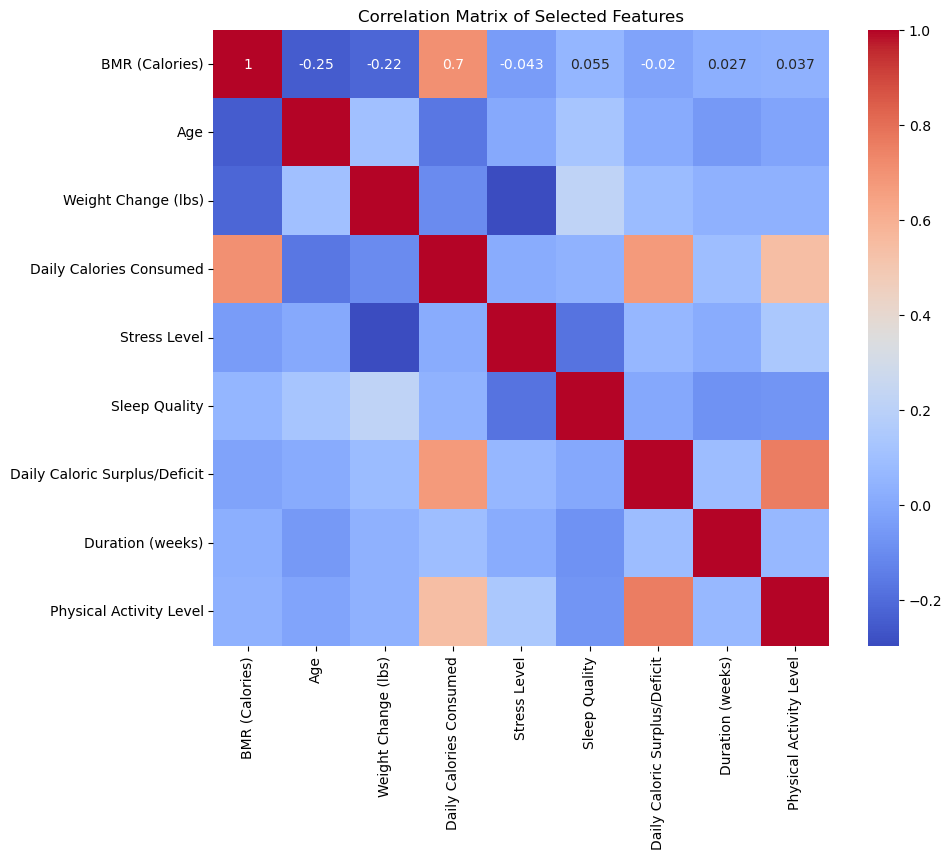

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the top features based on the above analysis
top_features = ['BMR (Calories)', 'Age', 'Weight Change (lbs)', 'Daily Calories Consumed', 'Stress Level', 'Sleep Quality', 'Daily Caloric Surplus/Deficit', 'Duration (weeks)', 'Physical Activity Level']

# Calculate correlation matrix
correlation_matrix = df_train[top_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Selected Features')
plt.show()



The strongest positive correlation here is between BMR (Calories) and Daily Calories Consumed with a correlation of around 0.7. This makes sense because a higher BMR often goes hand-in-hand with higher daily caloric intake, as people with higher metabolic rates generally consume more calories to maintain their energy balance.


There’s a weak negative correlation (-0.25) between Age and BMR. This suggests that as people age, their BMR tends to decrease slightly, which is consistent with physiological patterns where metabolism generally slows down with age.


There’s a notable negative correlation between Stress Level and Sleep Quality. This implies that as stress increases, sleep quality tends to decrease, highlighting the connection between stress and poor sleep.


There’s a positive correlation between Physical Activity Level and Duration (weeks). This could indicate that those with longer durations in a program or routine may have higher levels of physical activity, perhaps due to being more consistent over time.


There’s no strong correlation shown here between Daily Caloric Surplus/Deficit and Weight Change (lbs) directly, suggesting that weight change might be influenced by other combined factors or longer-term caloric imbalances rather than just day-to-day caloric intake.

The low score of Physical Activity or Daily Calories on feature-selection is explained by the high correlation between themselves, since one can be direct consequence of the other.

## 2e) On the base of the analysis performed above, define a dataset that we will exploit in the rest of the project (dataset_reduced), for the supervised task

In [39]:
# Combine train and test datasets with selected columns
columns_to_keep = [
    'BMR (Calories)', 
    'Daily Calories Consumed', 
    'Daily Caloric Surplus/Deficit',
    'Age', 
    'Sleep Quality', 
    'Stress Level', 
    'Weight Change (lbs)',
    'Smoking',
    'Gender',
    'Final Weight (lbs)'
    

]

# Select only the specified columns from both datasets
dataset_reduced = pd.concat([df_train[columns_to_keep], df_test[columns_to_keep]], ignore_index=True)


In [40]:
# Renaming columns
dataset_reduced.rename(columns={'BMR (Calories)': 'BMR', 'Weight Change (lbs)': 'Weight Change', 'Duration (weeks)' : 'Duration'}, inplace=True)

dataset_reduced

BMR  Daily Calories Consumed  Daily Caloric Surplus/Deficit  \
0   -0.801327                -0.183516                       0.549898   
1    1.299901                 0.644014                      -0.418486   
2   -0.859021                -0.491584                       0.181206   
3   -0.203374                -0.406146                      -0.360415   
4   -1.140115                -0.624983                       0.279128   
..        ...                      ...                            ...   
565  0.577709                 0.005026                      -0.576886   
566 -0.557034                 0.670775                       1.487782   
567 -1.276077                -2.105721                      -1.635808   
568  1.348544                 1.482376                       0.694373   
569  0.427513                 0.339626                      -0.019970   

          Age  Sleep Quality  Stress Level  Weight Change  Smoking  Gender  \
0   -0.397961       2.914605      0.162118      -0.377834        0       0   
1   -1.886392      -0.315161     -0.419600       0.149909        0       1   
2    0.718363      -0.315161      0.162118       0.929860        0       0   
3   -0.025853      -0.315161      0.162118       0.058064        0       1   
4    0.222219      -0.315161     -0.419600       0.240296        0       0   
..        ...            ...           ...            ...      ...     ...   
565 -1.018141       0.761428      0.162118       0.679109        1       1   
566  0.098183       0.761428      0.743836       0.996921        0       0   
567 -0.521997      -0.315161      0.162118       0.555192        0       1   
568  2.082758      -0.315161     -1.583036      -0.673778        0       1   
569 -0.521997      -0.315161      0.162118       1.093139        1       1   

     Final Weight (lbs)  
0                139.60  
1                192.53  
2                156.07  
3                169.13  
4                150.17  
..                  ...  
565              187.93  
566              155.30  
567              140.47  
568              204.10  
569              176.50  

[570 rows x 10 columns]

# 3. Supervised system based on Linear Regression capable of predicting the Final Weight (lbs) under the two conditions specified in the preamble

## 3a) Linear Regression exploiting the sklearn implementation of the algorithm.

In [41]:

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Condition 1: With BMR
X_with_BMR = dataset_reduced.drop(columns=['Final Weight (lbs)'])
y = dataset_reduced['Final Weight (lbs)']

# Condition 2: Without BMR
X_without_BMR = dataset_reduced.drop(columns=['Final Weight (lbs)', 'BMR'])



# Split the dataset into training and testing sets
X_train_with_BMR, X_test_with_BMR, y_train, y_test = train_test_split(X_with_BMR, y, test_size=0.3, random_state=42)
X_train_without_BMR, X_test_without_BMR = train_test_split(X_without_BMR, test_size=0.3, random_state=42)

# Train the model
lr_with_BMR = LinearRegression().fit(X_train_with_BMR, y_train)
lr_without_BMR = LinearRegression().fit(X_train_without_BMR, y_train)

# Predictions
y_pred_with_BMR = lr_with_BMR.predict(X_test_with_BMR)
y_pred_without_BMR = lr_without_BMR.predict(X_test_without_BMR)



In [42]:
# Call the function for each set of predictions
results_3a_with_BMR = X_test_with_BMR.copy()
results_3a_with_BMR['Final Weight (lbs)'] = y_test
results_3a_with_BMR['Predicted Target'] = y_pred_with_BMR

# Call the function for each set of predictions
results_3a_without_BMR = X_test_without_BMR.copy()
results_3a_without_BMR['Final Weight (lbs)'] = y_test
results_3a_without_BMR['Predicted Target'] = y_pred_without_BMR


I will store for each supervised system for dataset_reduced the predictions. This will be needed for task 5 to compare the performances of each system on the test samples


In [43]:
# Evaluate the model
print("With BMR:")
print(f"MSE: {mean_squared_error(y_test, y_pred_with_BMR)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_with_BMR))}")
print(f"R^2: {r2_score(y_test, y_pred_with_BMR)}")

print("\nWithout BMR:")
print(f"MSE: {mean_squared_error(y_test, y_pred_without_BMR)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_without_BMR))}")
print(f"R^2: {r2_score(y_test, y_pred_without_BMR)}")


With BMR:
MSE: 52.155114787220754
RMSE: 7.221849817548185
R^2: 0.8594414783099337

Without BMR:
MSE: 74.04772837902367
RMSE: 8.605098975550698
R^2: 0.8004406801149758


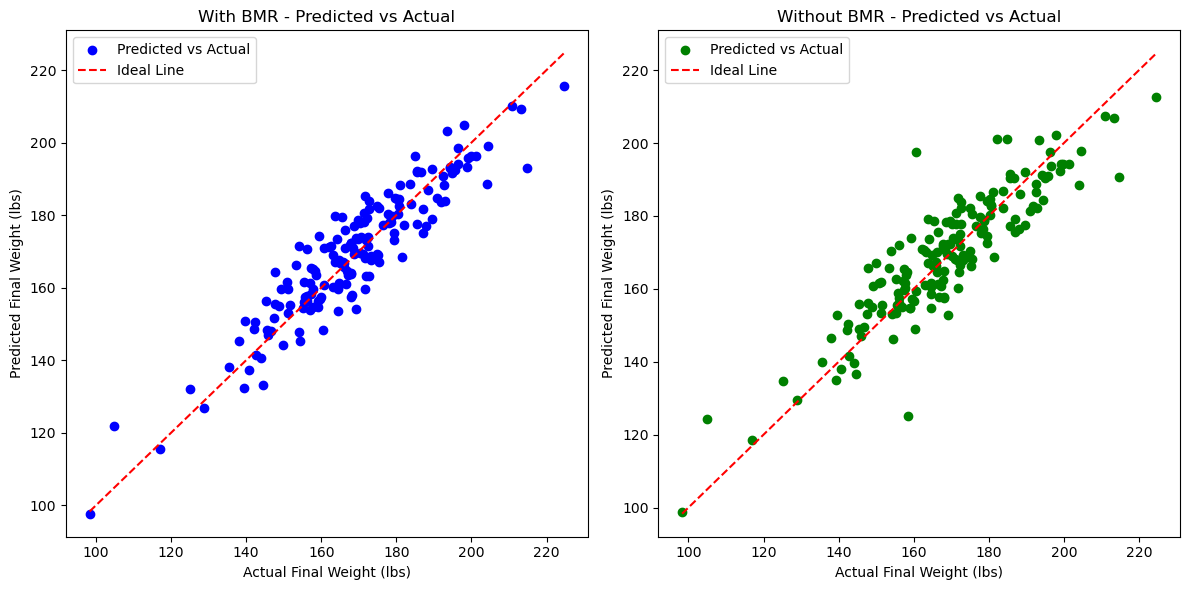

In [44]:
#Plotting the predicted vs actual values for both conditions

# With BMR
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create a subplot for the first plot
plt.scatter(y_test, y_pred_with_BMR, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Final Weight (lbs)')
plt.ylabel('Predicted Final Weight (lbs)')
plt.title('With BMR - Predicted vs Actual')
plt.legend()

# Without BMR
plt.subplot(1, 2, 2)  # Create a subplot for the second plot
plt.scatter(y_test, y_pred_without_BMR, color='green', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Final Weight (lbs)')
plt.ylabel('Predicted Final Weight (lbs)')
plt.title('Without BMR - Predicted vs Actual')
plt.legend()

plt.tight_layout()
plt.show()

The reason the model works without BMR, even though is an essential feature, is because i kept Daily Calories Consumed instead of outright removing it, acting as a proxy for BMR. Their high correlation (0.7), while it might lead to Multicollinearity, it still maximizes prediction accuracy, other than providing complementary information.
In fact, even though DCC may act as a proxy, the model performs worse than it would if it had BMR too.

But generally, the tighter clustering suggests that the model has learned a strong, accurate relationship between the features and Final Weight. The high R^2 means that whether you have BMR or DCC, you can predict well the target feature, since more than 80% of the variance in the dependent variable is explained by the model

## 3b) Linear Regression exploiting a Batch Gradient Descent learning procedure. Identifying the best value of learning rate  and an appropriate number of iterations which ensures the convergence of the model.

In [45]:
class GradientDescentRegressor:
    def __init__(self, learning_rate=0.01, n_iterations=1000, batch_size=None, verbose=True):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        self.loss_history = []
        self.convergence_iteration = None
        self.convergence_threshold = 1e-7  # Stricter threshold
        self.patience = 10  # More patience to ensure true convergence
        self.verbose = verbose  # New parameter to control printing
    
    def fit(self, X, y):
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values
            
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        consecutive_small_changes = 0
        min_loss = float('inf')
        min_loss_iteration = 0
        
        for i in range(self.n_iterations):
            if self.batch_size:  # Mini-batch GD
                indices = np.random.permutation(n_samples)
                X_shuffled = X[indices]
                y_shuffled = y[indices]
                
                for start_idx in range(0, n_samples, self.batch_size):
                    end_idx = min(start_idx + self.batch_size, n_samples)
                    X_batch = X_shuffled[start_idx:end_idx]
                    y_batch = y_shuffled[start_idx:end_idx]
                    self._update_parameters(X_batch, y_batch)
            else:  # Batch GD
                self._update_parameters(X, y)
            
            # Calculate loss for the full dataset
            y_pred = self.predict(X)
            current_loss = np.mean((y_pred - y) ** 2)
            self.loss_history.append(current_loss)
            
            # Update minimum loss
            if current_loss < min_loss:
                min_loss = current_loss
                min_loss_iteration = i
            
            # Check for convergence
            if i > 0:
                loss_change = abs(self.loss_history[-1] - self.loss_history[-2])
                relative_change = loss_change / self.loss_history[-2]
                
                if relative_change < self.convergence_threshold:
                    consecutive_small_changes += 1
                else:
                    consecutive_small_changes = 0
                    
                if consecutive_small_changes >= self.patience:
                    if self.verbose:
                        print(f"\nModel converged at iteration {i-self.patience}")
                        print(f"Initial loss: {self.loss_history[0]:.4f}")
                        print(f"Final loss: {current_loss:.4f}")
                        print(f"Relative improvement: {(self.loss_history[0] - current_loss)/self.loss_history[0]*100:.2f}%")
                        print(f"Best loss ({min_loss:.4f}) achieved at iteration {min_loss_iteration}")
                    self.convergence_iteration = i-self.patience
                    break
            
            # Print progress every 100 iterations if not converged
            if self.verbose and (i+1) % 100 == 0:
                print(f"Iteration {i+1}/{self.n_iterations}, Loss: {current_loss:.4f}")
        
        if self.convergence_iteration is None:
            if self.verbose:
                print("\nWarning: Model did not converge within the maximum iterations")
                print(f"Best loss ({min_loss:.4f}) achieved at iteration {min_loss_iteration}")
            self.convergence_iteration = min_loss_iteration
    
    def _update_parameters(self, X, y):
        n_samples = X.shape[0]
        y_pred = self.predict(X)
        dw = (2/n_samples) * np.dot(X.T, (y_pred - y))
        db = (2/n_samples) * np.sum(y_pred - y)
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

        #applying the learned weights and bias to the input data
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


Creating a class for both batch and mini-batch allows me to control the optimization process. You can experiment with different learning rates, batch sizes (batch vs. mini-batch), and stopping criteria. 


-Main Gradient Descent Loop:

    For each iteration (up to n_iterations), the loop performs the following:
    
    Mini-batch Gradient Descent (if batch_size is set): Randomly shuffles the data and divides it into batches. For each batch, it updates the model’s weights and bias by calling _update_parameters.
    
    Batch Gradient Descent (if batch_size is None): Updates parameters for the entire dataset at once.
    
    Loss Calculation: After updating parameters, the loss (MSE) is computed for the full dataset. This value is appended to loss_history for tracking.
    
    Early Stopping:
    
    Compares the relative change in loss between consecutive iterations to convergence_threshold.
    If this relative change is consistently small, the model stops early, assuming convergence has been achieved (THis unfortunately doesn't work very well, many times the learning curve hits a plateau but the loop doesn't register it as achieving convergence, even though sometimes it happens)
    Verbose Output: If verbose is set to True, it prints the progress every 100 iterations and outputs detailed convergence information.

-update_param. method
    
    this method performs a single gradient descent step
    
    Gradient Calculation:
        Computes the gradient of the loss with respect to the weights (dw) and bias (db).
        The gradients are scaled by the batch size (or full dataset size in batch mode) to ensure stable updates.
        Parameter Update:
        Updates weights and bias by moving them in the opposite direction of the gradient (scaled by learning_rate).


In [46]:
def evaluate_models(X_train, X_test, y_train, y_test, learning_rates, batch_sizes=None, max_iterations=1000, verbose=True):
    results = []
    
    for lr in learning_rates:
        if batch_sizes:  # Mini-batch GD
            for batch_size in batch_sizes:
                model = GradientDescentRegressor(
                    learning_rate=lr, 
                    n_iterations=max_iterations, 
                    batch_size=batch_size, 
                    verbose=verbose  # Pass the verbose parameter
                )
                model.fit(X_train, y_train)
                
                # Test performance
                y_pred = model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)
                
                results.append({
                    'learning_rate': lr,
                    'batch_size': batch_size,
                    'iterations': len(model.loss_history),
                    'mse': mse,
                    'r2': r2,
                    'loss_history': model.loss_history,
                    'model': model
                })
        else:  # Batch GD
            model = GradientDescentRegressor(
                learning_rate=lr, 
                n_iterations=max_iterations, 
                verbose=verbose  # Pass the verbose parameter
            )
            model.fit(X_train, y_train)
            
            # Test performance
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            
            results.append({
                'learning_rate': lr,
                'batch_size': None,
                'iterations': len(model.loss_history),
                'mse': mse,
                'r2': r2,
                'loss_history': model.loss_history,
                'model': model
            })
    
    return results


For each learning rate (and batch size if specified), the function creates an instance of the class above. trained on the training set, the convergence information is tracked. Results are stored in a dictionary

In [47]:
def plot_learning_curves(results, title, batch_mode=False):
    plt.figure(figsize=(12, 6))
    for result in results:
        label = f"lr={result['learning_rate']}"
        if batch_mode:
            label += f", batch={result['batch_size']}"
        plt.plot(result['loss_history'], label=label)
    
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.yscale('log')
    plt.show()

In [48]:
X_with_BMR = dataset_reduced.drop(columns=['Final Weight (lbs)'])
y = dataset_reduced['Final Weight (lbs)']

# Condition 2: Without BMR
X_without_BMR = dataset_reduced.drop(columns=['Final Weight (lbs)', 'BMR'])

# Split the data for both conditions
X_train_with_BMR, X_test_with_BMR, y_train, y_test = train_test_split(
    X_with_BMR, y, test_size=0.3, random_state=42
)
X_train_without_BMR, X_test_without_BMR, _, _ = train_test_split(
    X_without_BMR, y, test_size=0.3, random_state=42
)

In [49]:
# Print best results
def print_best_results(results):
    best_result = min(results, key=lambda x: x['mse'])
    print(f"\nBest Model Results:")
    print(f"Learning Rate: {best_result['learning_rate']}")
    if best_result['batch_size']:
        print(f"Batch Size: {best_result['batch_size']}")
    print(f"Iterations to Converge: {best_result['iterations']}")
    print(f"MSE: {best_result['mse']:.4f}")
    print(f"R2 Score: {best_result['r2']:.4f}")

The lambda func. finds the "smallest" item in a list based on a specified criterion, which is finding the lowest mean squared error in this case, so the best conclusion

Iteration 100/1000, Loss: 51.4146
Iteration 200/1000, Loss: 48.6038
Iteration 300/1000, Loss: 48.5571
Iteration 400/1000, Loss: 48.5398
Iteration 500/1000, Loss: 48.5309
Iteration 600/1000, Loss: 48.5263
Iteration 700/1000, Loss: 48.5240
Iteration 800/1000, Loss: 48.5228

Model converged at iteration 886
Initial loss: 16015.5434
Final loss: 48.5221
Relative improvement: 99.70%
Best loss (48.5221) achieved at iteration 896
Iteration 100/1000, Loss: 890.1636
Iteration 200/1000, Loss: 407.8174
Iteration 300/1000, Loss: 235.1067
Iteration 400/1000, Loss: 147.4997
Iteration 500/1000, Loss: 101.9226
Iteration 600/1000, Loss: 77.8053
Iteration 700/1000, Loss: 64.8359
Iteration 800/1000, Loss: 57.7518
Iteration 900/1000, Loss: 53.8249
Iteration 1000/1000, Loss: 51.6179

Best loss (51.6179) achieved at iteration 999
Iteration 100/1000, Loss: 17343.9210
Iteration 200/1000, Loss: 10665.7440
Iteration 300/1000, Loss: 6723.3824
Iteration 400/1000, Loss: 4380.7470
Iteration 500/1000, Loss: 2976.2216

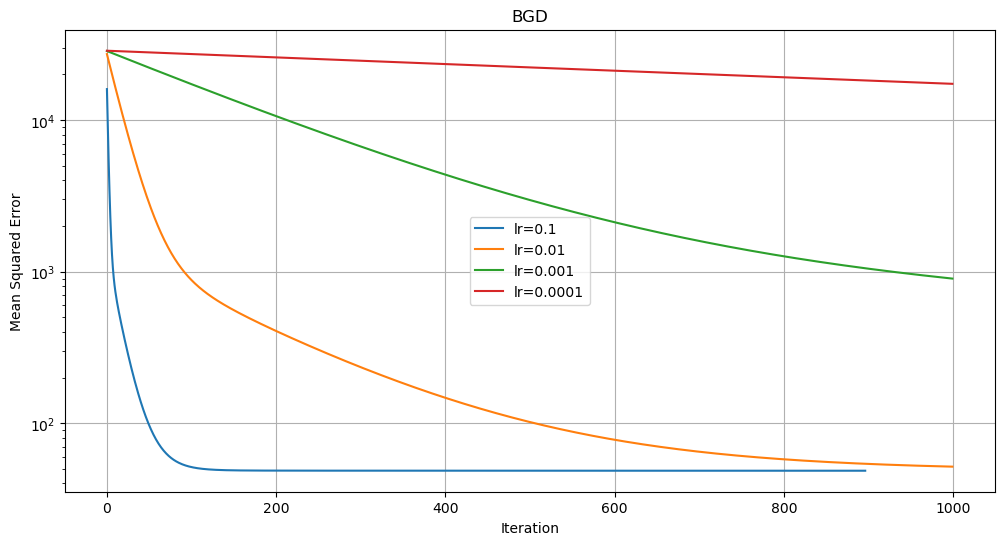


Best Model Results:
Learning Rate: 0.1
Iterations to Converge: 897
MSE: 52.1387
R2 Score: 0.8595


In [50]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
batch_sizes = [2, 4, 8, 16, 32, 64, 128]
max_iterations = 1000

# For batch gradient descent
batch_results = evaluate_models(X_train_with_BMR, X_test_with_BMR, y_train, y_test, 
                              learning_rates=learning_rates, verbose=True)
plot_learning_curves(batch_results, 'BGD')

print_best_results(batch_results)

# Extract the best model based on some criterion (e.g., lowest MSE)
best_batch_model_with_BMR = min(batch_results, key=lambda x: x['mse'])['model']

# Make predictions using the best batch models
y_pred_batch_with_BMR = best_batch_model_with_BMR.predict(X_test_with_BMR)




At the start of training, the model’s weights are typically initialized to zero or small random values. Since the model has no learned information yet, its initial predictions will generally be poor, that's why I observe high loss (high MSE) on the graph.

0.1 is an high learning rate, so there could have been a risk of overshooting, but fortunately it results stable and achieves a (relatively) quick convergence(the error can't be no longer reduced)

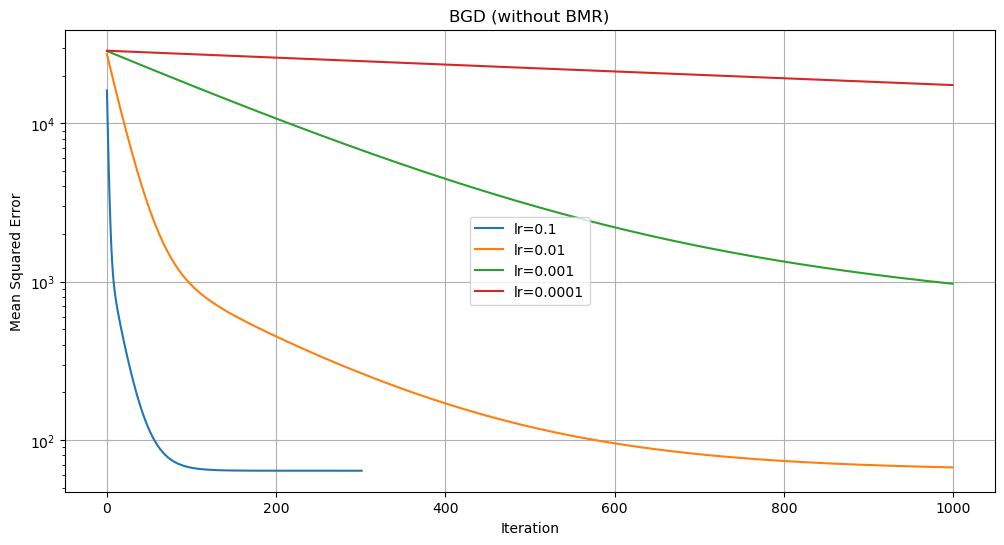


Best Model Results:
Learning Rate: 0.1
Iterations to Converge: 302
MSE: 74.0569
R2 Score: 0.8004


In [51]:
batch_results = evaluate_models(X_train_without_BMR, X_test_without_BMR, y_train, y_test, 
                              learning_rates=learning_rates,  verbose=False)
plot_learning_curves(batch_results, 'BGD (without BMR)')

print_best_results(batch_results)

# Extract the best model based on some criterion (e.g., lowest MSE)
best_batch_model_without_BMR = min(batch_results, key=lambda x: x['mse'])['model']

# Make predictions using the best batch models
y_pred_batch_without_BMR = best_batch_model_without_BMR.predict(X_test_without_BMR)




The model converges faster, but without BMR the error is greater and the model is less accurate 

In [52]:
# Call the function for each set of predictions
results_3b_with_BMR = X_test_with_BMR.copy()
results_3b_with_BMR['Final Weight (lbs)'] = y_test
results_3b_with_BMR['Predicted Target'] = y_pred_batch_with_BMR

# Call the function for each set of predictions
results_3b_without_BMR = X_test_without_BMR.copy()
results_3b_without_BMR['Final Weight (lbs)'] = y_test
results_3b_without_BMR['Predicted Target'] = y_pred_batch_without_BMR


## 3c)Linear Regression exploiting a Mini-Batch Gradient Descent learningprocedure. Identifying the best value of learning rate and an appropriate number of iterations which ensures the convergence of the model.


Iteration 100/2000, Loss: 433.4048
Iteration 200/2000, Loss: 96.0494
Iteration 300/2000, Loss: 213.8901
Iteration 400/2000, Loss: 118.4240
Iteration 500/2000, Loss: 845.4823
Iteration 600/2000, Loss: 119.9698
Iteration 700/2000, Loss: 242.7846
Iteration 800/2000, Loss: 126.0004
Iteration 900/2000, Loss: 112.1687
Iteration 1000/2000, Loss: 71.6251
Iteration 1100/2000, Loss: 116.0287
Iteration 1200/2000, Loss: 662.1772
Iteration 1300/2000, Loss: 462.0532
Iteration 1400/2000, Loss: 92.8772
Iteration 1500/2000, Loss: 94.8163
Iteration 1600/2000, Loss: 122.5103
Iteration 1700/2000, Loss: 328.1221
Iteration 1800/2000, Loss: 277.4948
Iteration 1900/2000, Loss: 129.3639
Iteration 2000/2000, Loss: 57.1165

Best loss (51.4301) achieved at iteration 378
Iteration 100/2000, Loss: 66.6781
Iteration 200/2000, Loss: 59.4580
Iteration 300/2000, Loss: 96.8331
Iteration 400/2000, Loss: 87.7537
Iteration 500/2000, Loss: 55.1324
Iteration 600/2000, Loss: 52.9123
Iteration 700/2000, Loss: 76.3174
Iteration

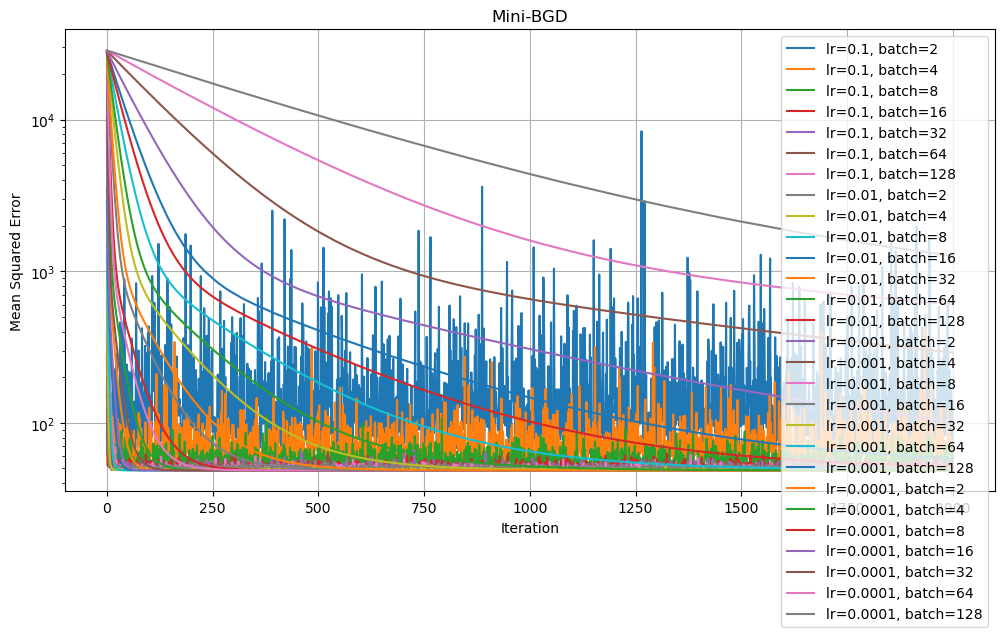


Best Model Results:
Learning Rate: 0.01
Batch Size: 2
Iterations to Converge: 2000
MSE: 49.9279
R2 Score: 0.8654


In [53]:
max_iterations = 2000

# For mini-batch gradient descent
minibatch_results = evaluate_models(X_train_with_BMR, X_test_with_BMR, y_train, y_test,
                                  learning_rates=learning_rates, batch_sizes=batch_sizes,
                                  max_iterations=max_iterations,  verbose=True)
plot_learning_curves(minibatch_results, 'Mini-BGD', batch_mode=True)


print_best_results(minibatch_results)

# Extract the best model based on some criterion (e.g., lowest MSE)
best_minibatch_model_with_BMR = min(minibatch_results, key=lambda x: x['mse'])['model']

# Make predictions using the best batch models
y_pred_minibatch_with_BMR = best_minibatch_model_with_BMR.predict(X_test_with_BMR)



Even with a learning rate like 0.1, my mini-batch model didn't manage to reach convergence with 2000 iterations (but the results don't really change even with higher fluctuations)

With smaller batches, there is more fluctuation in the loss curve, which is expected because smaller batches contain less information about the overall dataset. This fluctuation, or noise, can sometimes help the model escape local minima, but it may also lead to less stable convergence. The updates can be a bit noisier (less stable) because each mini-batch doesn’t represent the entire dataset perfectly.

Medium Batch Sizes show moderate fluctuations and steady progress toward lower error levels, with faster convergence than large batch sizes.

Larger Batch Sizes are smoother, However, they also converge more slowly compared to smaller batches, as they behave closer to traditional batch gradient descent.

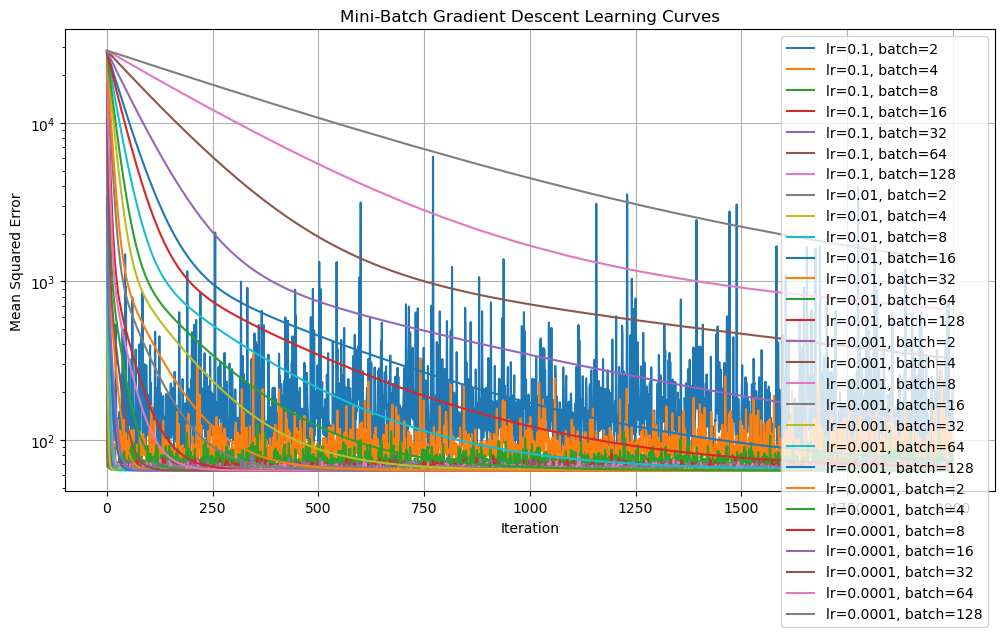


Best Model Results:
Learning Rate: 0.1
Batch Size: 32
Iterations to Converge: 2000
MSE: 70.0162
R2 Score: 0.8113


In [54]:
# For mini-batch gradient descent (no BMR)
minibatch_results = evaluate_models(X_train_without_BMR, X_test_without_BMR, y_train, y_test,
                                  learning_rates=learning_rates, batch_sizes=batch_sizes,
                                  max_iterations=max_iterations,  verbose=False)
plot_learning_curves(minibatch_results, 'Mini-Batch Gradient Descent Learning Curves', batch_mode=True)


print_best_results(minibatch_results)

# Extract the best model based on some criterion (e.g., lowest MSE)
best_minibatch_model_without_BMR = min(minibatch_results, key=lambda x: x['mse'])['model']

# Make predictions using the best batch models
y_pred_minibatch_without_BMR = best_minibatch_model_without_BMR.predict(X_test_without_BMR)



as expected, similiar results to with_BMR, but  slightly worse

In [55]:
# Call the function for each set of predictions
results_3c_with_BMR = X_test_with_BMR.copy()
results_3c_with_BMR['Final Weight (lbs)'] = y_test
results_3c_with_BMR['Predicted Target'] = y_pred_minibatch_with_BMR

# Call the function for each set of predictions
results_3c_without_BMR = X_test_without_BMR.copy()
results_3c_without_BMR['Final Weight (lbs)'] = y_test
results_3c_without_BMR['Predicted Target'] = y_pred_minibatch_without_BMR


: If the learning rate is too high, the algorithm can overshoot the optimal solution, causing fluctuations in the cost function across iterations. This can lead to a negative percentage change if the cost value increases instead of decreasing.



## 3d) dataset_augmented will be the dataset with augmented or polynomial features. With this dataset, we train a new Linear regression model based on a Batch Gradient Descent learning procedure. At last we identify the best value of learning rate alpha and an appropriate number of iterations which ensures the convergence of the model.



In [56]:
df2 = pd.concat([df_train, df_test], ignore_index=True)


to retrieve the dataset with all the features before reducing it, we go back to 2b, retrieve the splitted dataset and remerge it together in a single istance

In [57]:
df2

Age  Gender  BMR (Calories)  Daily Calories Consumed  \
0   -0.397961       0       -0.801327                -0.183516   
1   -1.886392       1        1.299901                 0.644014   
2    0.718363       0       -0.859021                -0.491584   
3   -0.025853       1       -0.203374                -0.406146   
4    0.222219       0       -1.140115                -0.624983   
..        ...     ...             ...                      ...   
565 -1.018141       1        0.577709                 0.005026   
566  0.098183       0       -0.557034                 0.670775   
567 -0.521997       1       -1.276077                -2.105721   
568  2.082758       1        1.348544                 1.482376   
569 -0.521997       1        0.427513                 0.339626   

     Daily Caloric Surplus/Deficit  Weight Change (lbs)  Duration (weeks)  \
0                         0.549898            -0.377834         -0.688957   
1                        -0.418486             0.149909          0.146795   
2                         0.181206             0.929860          1.400422   
3                        -0.360415             0.058064         -1.106833   
4                         0.279128             0.240296          1.400422   
..                             ...                  ...               ...   
565                      -0.576886             0.679109         -0.688957   
566                       1.487782             0.996921         -1.524709   
567                      -1.635808             0.555192         -1.942584   
568                       0.694373            -0.673778          0.146795   
569                      -0.019970             1.093139          0.146795   

     Smoking  Physical Activity Level  Sleep Quality  Stress Level  \
0          0                -0.607486       2.914605      0.162118   
1          0                -1.898017      -0.315161     -0.419600   
2          0                -0.607486      -0.315161      0.162118   
3          0                -0.607486      -0.315161      0.162118   
4          0                 0.683044      -0.315161     -0.419600   
..       ...                      ...            ...           ...   
565        1                -0.607486       0.761428      0.162118   
566        0                 0.683044       0.761428      0.743836   
567        0                -0.607486      -0.315161      0.162118   
568        0                 1.973575      -0.315161     -1.583036   
569        1                -0.607486      -0.315161      0.162118   

     Final Weight (lbs)  Work_Private  Work_Public  Work_Self-Employed  \
0                139.60         False        False                True   
1                192.53         False        False               False   
2                156.07         False        False                True   
3                169.13          True        False               False   
4                150.17         False        False                True   
..                  ...           ...          ...                 ...   
565              187.93         False        False                True   
566              155.30          True        False               False   
567              140.47         False         True               False   
568              204.10         False        False                True   
569              176.50         False         True               False   

     Work_Unemployed  Work_Unknown  
0              False         False  
1              False          True  
2              False         False  
3              False         False  
4              False         False  
..               ...           ...  
565            False         False  
566            False         False  
567            False         False  
568            False         False  
569            False         False  

[570 rows x 17 columns]

In [58]:

from sklearn.preprocessing import PolynomialFeatures


def get_feature_names(poly, input_features):
    """
    Get feature names for polynomial features
    """
    # Get raw feature names from PolynomialFeatures
    raw_names = poly.get_feature_names_out(input_features)
    
    # Clean up the feature names for better readability
    clean_names = []
    for name in raw_names:
        # Replace x0, x1, etc with actual feature names
        name = name.replace(' ', '_')
        name = name.replace('^', '_pow_')
        name = name.replace('_1_', '_')  # Remove _1_ from interaction terms
        clean_names.append(name)
    
    return clean_names

def create_augmented_dataset(df, target_col, include_bmr=True):
    """
    Create augmented dataset with polynomial features
    
    Parameters:
    df: DataFrame containing the original data
    target_col: Name of the target column
    include_bmr: Whether to include BMR column
    
    Returns:
    X_train_df, X_test_df: Training and test DataFrames with polynomial features
    y_train, y_test: Training and test target values
    """
    # Separate features and target
    if include_bmr:
        X = df.drop(columns=[target_col])
    else:
        X = df.drop(columns=[target_col, 'BMR (Calories)'])
    
    y = df[target_col]
    
    # Generate polynomial features
    poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
    
    # Get feature names before transformation
    feature_names = X.columns.tolist()
    
    # Transform the data
    X_poly = poly.fit_transform(X)
    
    # Get polynomial feature names
    poly_feature_names = get_feature_names(poly, feature_names)
    
    # Create DataFrame with polynomial features
    X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)
    
    # Standardize the features
    scaler = StandardScaler()
    X_poly_scaled = scaler.fit_transform(X_poly_df)
    X_poly_scaled_df = pd.DataFrame(X_poly_scaled, columns=poly_feature_names)
    
    # Split into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X_poly_scaled_df, y, test_size=0.3, random_state=42
    )
    
    return X_train, X_test, y_train, y_test


# Create augmented datasets for both conditions
X_train_with_BMR, X_test_with_BMR, y_train_with_BMR, y_test_with_BMR = create_augmented_dataset(
    df2, 'Final Weight (lbs)', include_bmr=True
)

X_train_without_BMR, X_test_without_BMR, y_train_without_BMR, y_test_without_BMR = create_augmented_dataset(
    df2, 'Final Weight (lbs)', include_bmr=False
)

# Now you can see the feature names
print("Features with BMR:")
print(X_train_with_BMR.columns.tolist())

# Check the shape of the augmented datasets
print("\nDataset shapes:")
print(f"With BMR - Training: {X_train_with_BMR.shape}, Testing: {X_test_with_BMR.shape}")
print(f"Without BMR - Training: {X_train_without_BMR.shape}, Testing: {X_test_without_BMR.shape}")



Features with BMR:
['Age', 'Gender', 'BMR_(Calories)', 'Daily_Calories_Consumed', 'Daily_Caloric_Surplus/Deficit', 'Weight_Change_(lbs)', 'Duration_(weeks)', 'Smoking', 'Physical_Activity_Level', 'Sleep_Quality', 'Stress_Level', 'Work_Private', 'Work_Public', 'Work_Self-Employed', 'Work_Unemployed', 'Work_Unknown', 'Age_pow_2', 'Age_Gender', 'Age_BMR_(Calories)', 'Age_Daily_Calories_Consumed', 'Age_Daily_Caloric_Surplus/Deficit', 'Age_Weight_Change_(lbs)', 'Age_Duration_(weeks)', 'Age_Smoking', 'Age_Physical_Activity_Level', 'Age_Sleep_Quality', 'Age_Stress_Level', 'Age_Work_Private', 'Age_Work_Public', 'Age_Work_Self-Employed', 'Age_Work_Unemployed', 'Age_Work_Unknown', 'Gender_pow_2', 'Gender_BMR_(Calories)', 'Gender_Daily_Calories_Consumed', 'Gender_Daily_Caloric_Surplus/Deficit', 'Gender_Weight_Change_(lbs)', 'Gender_Duration_(weeks)', 'Gender_Smoking', 'Gender_Physical_Activity_Level', 'Gender_Sleep_Quality', 'Gender_Stress_Level', 'Gender_Work_Private', 'Gender_Work_Public', 'Gen

The PolynomialFeatures class is used with degree=2, which generates squared terms for each feature and interaction terms between each pair of features. 
This increases the feature space significantly and allows the model to capture more complex relationships in the data.This increases the model's capacity to capture non-linear relationships in the data (which are not a lot, considering that linear-based models explain at least 80% of the variance of Final Weight) but also increases the risk of overfitting.

After creating the polynomial features, the expanded datasets are standardized (again) to ensure that the  squared terms and interaction terms are also in the same range as the main features.


Evaluating models with BMR:
Iteration 100/1000, Loss: 36.2389
Iteration 200/1000, Loss: 31.9776
Iteration 300/1000, Loss: 31.4804
Iteration 400/1000, Loss: 31.3299
Iteration 500/1000, Loss: 31.2562
Iteration 600/1000, Loss: 31.2126
Iteration 700/1000, Loss: 31.1839
Iteration 800/1000, Loss: 31.1633
Iteration 900/1000, Loss: 31.1475
Iteration 1000/1000, Loss: 31.1345

Best loss (31.1345) achieved at iteration 999
Iteration 100/1000, Loss: 643.8120
Iteration 200/1000, Loss: 83.9738
Iteration 300/1000, Loss: 49.0936
Iteration 400/1000, Loss: 40.1738
Iteration 500/1000, Loss: 36.3262
Iteration 600/1000, Loss: 34.3683
Iteration 700/1000, Loss: 33.2812
Iteration 800/1000, Loss: 32.6401
Iteration 900/1000, Loss: 32.2429
Iteration 1000/1000, Loss: 31.9857

Best loss (31.9857) achieved at iteration 999
Iteration 100/1000, Loss: 18654.6430
Iteration 200/1000, Loss: 12376.5320
Iteration 300/1000, Loss: 8300.0725
Iteration 400/1000, Loss: 5613.9235
Iteration 500/1000, Loss: 3828.3939
Iteration 60

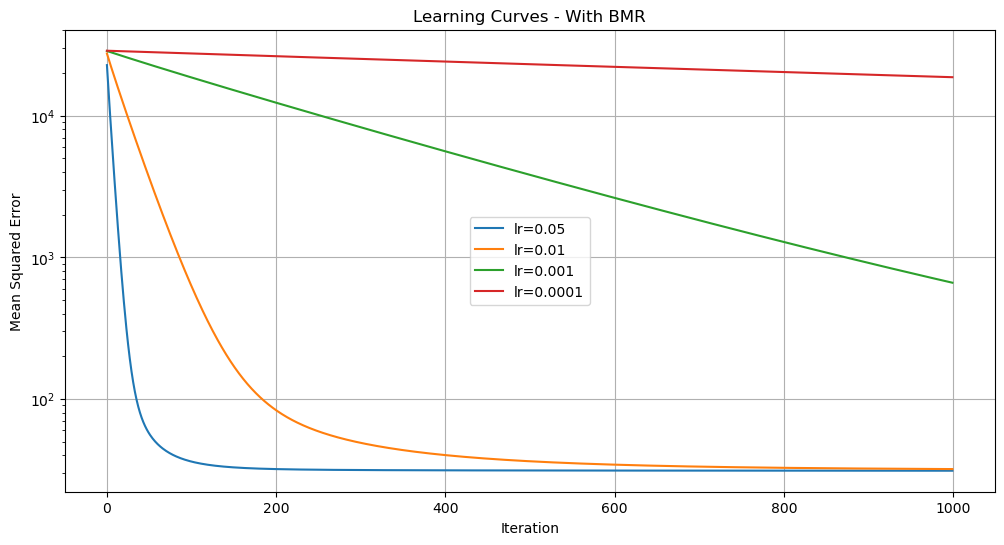


Best Model Results:
Learning Rate: 0.01
Iterations to Converge: 1000
MSE: 50.9361
R2 Score: 0.8627


In [59]:
# Define learning rates to test
learning_rates = [0.05, 0.01, 0.001, 0.0001]
max_iterations = 1000 #it takes too much to converge, not even 50k is enough

# Evaluate models with BMR
print("\nEvaluating models with BMR:")
results_with_BMR = evaluate_models(
    X_train_with_BMR, 
    X_test_with_BMR, 
    y_train_with_BMR, 
    y_test_with_BMR, 
    learning_rates, 
    batch_sizes=None,  # Using batch GD
    max_iterations=max_iterations
)

# Plot learning curves for models with BMR
plot_learning_curves(results_with_BMR, "Learning Curves - With BMR")
print_best_results(results_with_BMR)





While my model doesn't manage to find the exact number of iterations for the convergence, augmenting the total maximum doesn't change the results by much: the loss diminshes each iteraction, but its so slow that you can consider it hitting a plateau


Evaluating models without BMR:


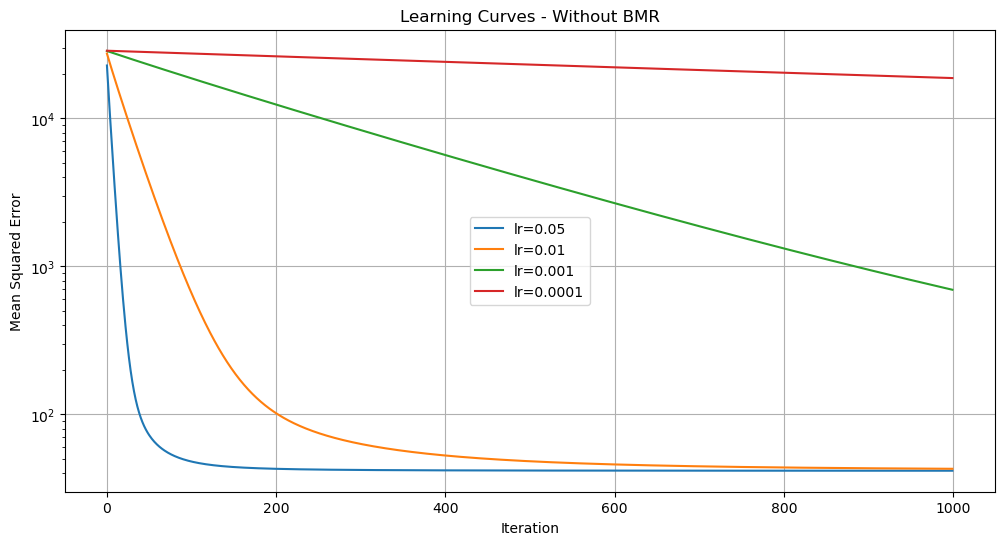


Best Model Results:
Learning Rate: 0.05
Iterations to Converge: 1000
MSE: 77.6991
R2 Score: 0.7906


In [60]:
# Evaluate models without BMR
print("\nEvaluating models without BMR:")
results_without_BMR = evaluate_models(
    X_train_without_BMR, 
    X_test_without_BMR, 
    y_train_without_BMR, 
    y_test_without_BMR, 
    learning_rates, 
    batch_sizes=None,  # Using batch GD
    max_iterations=max_iterations,
    verbose=False
)

# Plot learning curves for models without BMR
plot_learning_curves(results_without_BMR, "Learning Curves - Without BMR")
print_best_results(results_without_BMR)

In [61]:
# Compare the best models
print("\nComparison Summary:")
best_with_BMR = min(results_with_BMR, key=lambda x: x['mse'])
best_without_BMR = min(results_without_BMR, key=lambda x: x['mse'])

print(f"\nBest Model With BMR:")
print(f"Learning Rate: {best_with_BMR['learning_rate']}")
print(f"MSE: {best_with_BMR['mse']:.4f}")
print(f"R2 Score: {best_with_BMR['r2']:.4f}")
print(f"Iterations to Converge: {best_with_BMR['iterations']}")

print(f"\nBest Model Without BMR:")
print(f"Learning Rate: {best_without_BMR['learning_rate']}")
print(f"MSE: {best_without_BMR['mse']:.4f}")
print(f"R2 Score: {best_without_BMR['r2']:.4f}")
print(f"Iterations to Converge: {best_without_BMR['iterations']}")


Comparison Summary:

Best Model With BMR:
Learning Rate: 0.01
MSE: 50.9361
R2 Score: 0.8627
Iterations to Converge: 1000

Best Model Without BMR:
Learning Rate: 0.05
MSE: 77.6991
R2 Score: 0.7906
Iterations to Converge: 1000


Results are, again, consistent

In [62]:
# Combine X_train and X_test back together (with BMR case)
dataset_augmented = pd.concat([X_train_with_BMR, X_test_with_BMR])

# Add the target variable back
y_combined = pd.concat([y_train_with_BMR, y_test_with_BMR])
dataset_augmented['Final Weight (lbs)'] = y_combined

dataset_augmented

Age    Gender  BMR_(Calories)  Daily_Calories_Consumed  \
522  0.497769  1.017700       -0.530969                -0.577066   
149 -2.229197 -0.982607        2.328882                 1.507617   
124  0.497769 -0.982607       -1.223384                -0.977083   
424 -0.741761  1.017700        0.333619                 0.088417   
196  0.745675 -0.982607        1.109755                 1.168874   
..        ...       ...             ...                      ...   
429 -0.369902  1.017700       -0.139868                -0.312605   
69   0.497769 -0.982607       -0.490241                -1.952519   
333 -1.237573 -0.982607       -0.402355                -1.032742   
177 -0.245949  1.017700        0.466278                 0.015703   
543  0.125910  1.017700        0.401566                -0.072142   

     Daily_Caloric_Surplus/Deficit  Weight_Change_(lbs)  Duration_(weeks)  \
522                      -0.248732            -1.046535         -1.994457   
149                      -0.256014            -1.874925          1.436220   
124                      -0.103479            -0.643657          1.007385   
424                      -0.202485            -2.440765         -0.279119   
196                       0.499906            -0.098941         -0.707953   
..                             ...                  ...               ...   
429                      -0.277620            -0.637621          0.149716   
69                       -2.172095             2.227793          0.578551   
333                      -1.001172            -0.040094          1.865055   
177                      -0.434849             0.240563         -1.565623   
543                       0.326453             1.354136         -0.707953   

      Smoking  Physical_Activity_Level  Sleep_Quality  ...  \
522 -0.450035                -0.570264      -1.422662  ...   
149 -0.450035                 0.719619      -1.422662  ...   
124 -0.450035                 0.719619      -1.422662  ...   
424 -0.450035                -0.570264      -1.422662  ...   
196 -0.450035                -0.570264       0.694616  ...   
..        ...                      ...            ...  ...   
429 -0.450035                -0.570264      -1.422662  ...   
69  -0.450035                -0.570264      -0.364023  ...   
333 -0.450035                -0.570264      -0.364023  ...   
177 -0.450035                 0.719619       1.753254  ...   
543 -0.450035                -0.570264       1.753254  ...   

     Work_Public_Work_Self-Employed  Work_Public_Work_Unemployed  \
522                             0.0                          0.0   
149                             0.0                          0.0   
124                             0.0                          0.0   
424                             0.0                          0.0   
196                             0.0                          0.0   
..                              ...                          ...   
429                             0.0                          0.0   
69                              0.0                          0.0   
333                             0.0                          0.0   
177                             0.0                          0.0   
543                             0.0                          0.0   

     Work_Public_Work_Unknown  Work_Self-Employed_pow_2  \
522                       0.0                 -0.548972   
149                       0.0                 -0.548972   
124                       0.0                  1.821588   
424                       0.0                 -0.548972   
196                       0.0                 -0.548972   
..                        ...                       ...   
429                       0.0                 -0.548972   
69                        0.0                  1.821588   
333                       0.0                  1.821588   
177                       0.0                 -0.548972   
543                       0.0                 -0.548972  

## 3e) We compare the related learning curve of the Gradient Descent-based approaches developed above and comment both on the learning procedure and on the generalization performances of the model.

I've developed three main gradient descent-based approaches, both with and without the BMR:

    Batch Gradient Descent (full batch): Processes the entire dataset in each iteration.
    
    Mini-Batch Gradient Descent: Divides the dataset into smaller batches, allowing for more frequent updates with added randomness.
    
    Augmented Dataset with Polynomial Features: Adds polynomial and interaction terms to capture non-linear relationships, and trains                                                   with batch gradient descent.


Learning curves plot the model's loss (MSE) on the training dataset over time (or iterations). When interpreting these curves, focus on:

Speed of Convergence: How quickly the loss decreases as the model trains.
Stability: The smoothness of the loss curve, indicating whether the model is consistently improving or bouncing around.
Overfitting: A sign of overfitting is if the training loss continues to decrease while the validation loss increases or plateaus, indicating the model is not generalizing well.
Best-Performing Learning Rate and Batch Size: the best balance of speed, stability, and final loss.


For BCD:
the optimal learning rate was around 0.1,  the error dropping almost immediatley and stabilizing after 200 iteractions  .Higher learning rates overshot the model, while lower learning rates took much longer to reach a much higher error level.

Mini-batch sizes:
introduced more randomness in the loss curve, which can be seen as slight fluctuations in the learning curve. Each small batch is just a slice of the full data, so it doesn’t perfectly represent the whole dataset. However, these smaller batches allowed for more frequent updates, which can help the model escape local minima and improve generalization, getting a better solution --> With smaller batches, the added randomness makes the model’s learning process a bit rougher, preventing it from becoming too attached to any one set of examples. it learns a more flexible, adaptable representation of the data rather than getting too fixed on specifics.

with Polynomial Features: 
the increases the number of parameters, making it harder for the model to converge within a limited number of iterations. This is evident since see a slow, steady decline of the loss, failing to reach a minimum MSE within an absurdily high amount of iterations.
This is a case of overfitting
Best Learning Rate: Lower learning rates (e.g., 0.05 or 0.01) are generally safer here, higher rates can cause the model to diverge. This is because polynomial features make the optimization landscape more complex (more peaks and valleys), making it easier to overshoot.


For the project, mini-batch is the better choice. For this type of problem, the generalization is the most important part for the variable prediction.

## 3f) With the dataset generated in the task above (dataset_augmented), train a Linear Regression model with Lasso regularization. Comment on the importance of each feature and reason over the number of features selected with different values of alpha. Verify how the model performances change with different values of alpha (different number of features). Use a plot of your choice.

In [63]:
def plot_learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error'):
    """
    Plots a learning curve for the given model, data, and scoring metric.
    
    Parameters:
    - model: The machine learning model to evaluate.
    - X: Feature set.
    - y: Target variable.
    - cv: Number of cross-validation folds.
    - train_sizes: Array of training set sizes as fractions.
    - scoring: Scoring method for evaluation (default is 'neg_mean_squared_error').
    
    Returns:
    - None (plots the learning curve).
    """
    # Generate learning curve data
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes
    )

    # Convert negative mean squared error to RMSE if necessary
    if 'neg_mean_squared_error' in scoring:
        train_scores = np.sqrt(-train_scores)
        val_scores = np.sqrt(-val_scores)
        ylabel = 'RMSE'
    else:
        ylabel = scoring

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores.mean(axis=1), 'r-', marker='o', label='Train')
    plt.plot(train_sizes, val_scores.mean(axis=1), 'b-', marker='o', label='Validation')
    plt.fill_between(train_sizes, train_scores.mean(axis=1) - train_scores.std(axis=1),
                     train_scores.mean(axis=1) + train_scores.std(axis=1), color='r', alpha=0.1)
    plt.fill_between(train_sizes, val_scores.mean(axis=1) - val_scores.std(axis=1),
                     val_scores.mean(axis=1) + val_scores.std(axis=1), color='b', alpha=0.1)
    plt.xlabel('Training set size')
    plt.ylabel(ylabel)
    plt.title(f'Learning Curve for {type(model).__name__}')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

L1 regularization encourages the model to set some feature coefficients exactly to zero, effectively performing feature selection.
Alpha is the regularization strength: a higher alpha penalizes large coefficients more strongly, leading to more coefficients being set to zero.

As alpha increases, the regularization penalty gets stronger, pushing more feature coefficients towards zero. This leads to simpler models with fewer active features, which can help generalize better if the model was previously overfitting.
Lower Alpha (e.g., 0.1): The training RMSE is lower, and more features are retained, meaning the model is capturing more details in the training data. However, if there's a significant gap between training and validation RMSE, it suggests some overfitting.
Higher Alpha (e.g., 1.0 or 2.0): The model becomes more regularized, which often increases training RMSE slightly but can improve validation RMSE, indicating better generalization.

In [64]:
def plot_top_feature_importance(model, feature_names, model_name, top_n=20):
    # Get coefficients and feature names
    coef = model.coef_
    
    # Create DataFrame of features and their coefficients
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': np.abs(coef)  # Take absolute value for importance
    })
    
    # Sort by absolute importance and get top N features
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    top_features = feature_importance.head(top_n)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    plt.barh(top_features['Feature'], top_features['Importance'])
    plt.title(f'Top {top_n} Feature Importance - {model_name}')
    plt.xlabel('Absolute Coefficient Value')
    plt.ylabel('Features')
    
    # Rotate x-axis labels if needed and adjust layout
    plt.tight_layout()
    plt.show()

Plotting learning curve for Lasso with alpha=0.0100


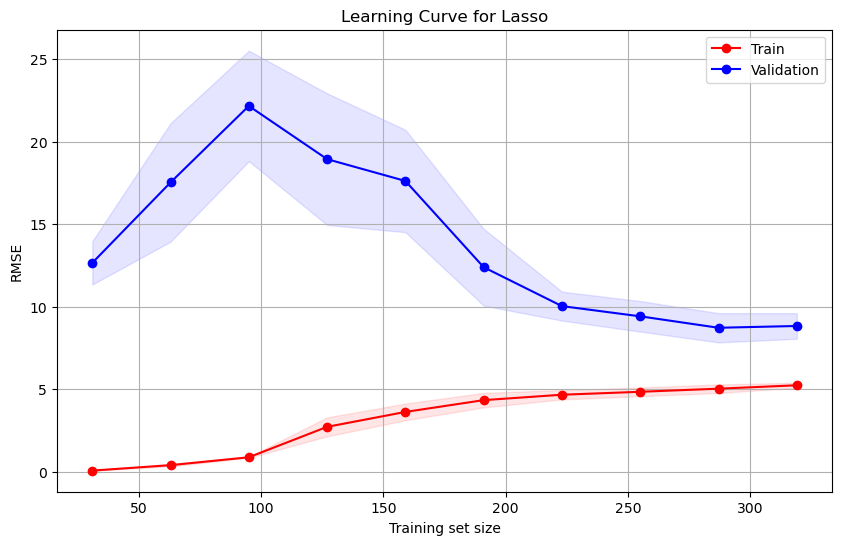

Plotting learning curve for Lasso with alpha=0.1000


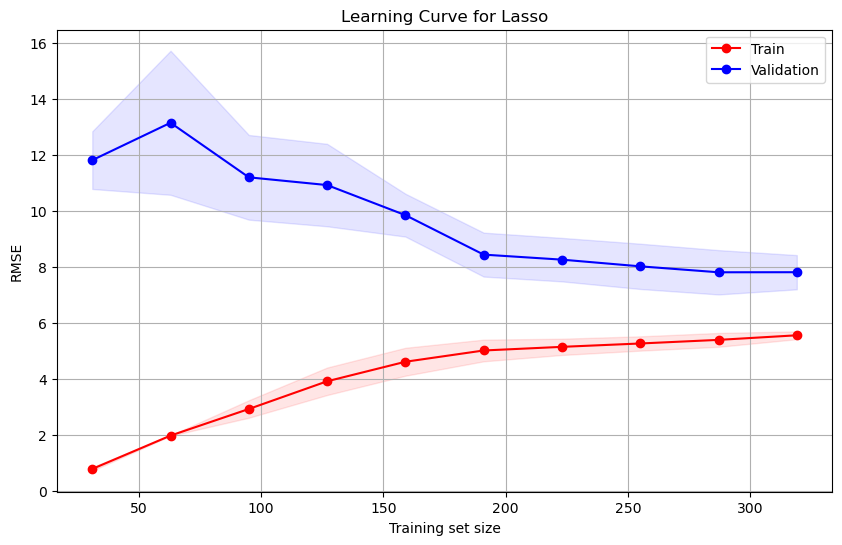

Plotting learning curve for Lasso with alpha=0.5000


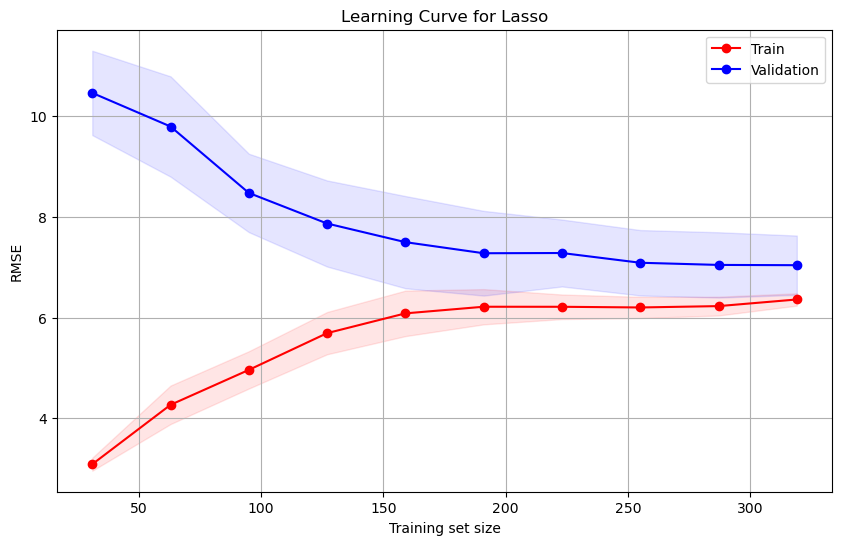

Plotting learning curve for Lasso with alpha=0.7000


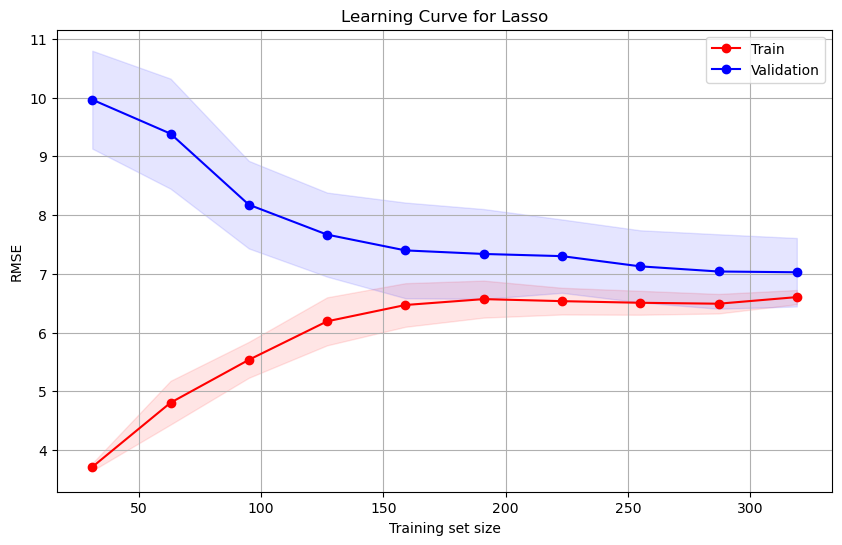

Plotting learning curve for Lasso with alpha=1.0000


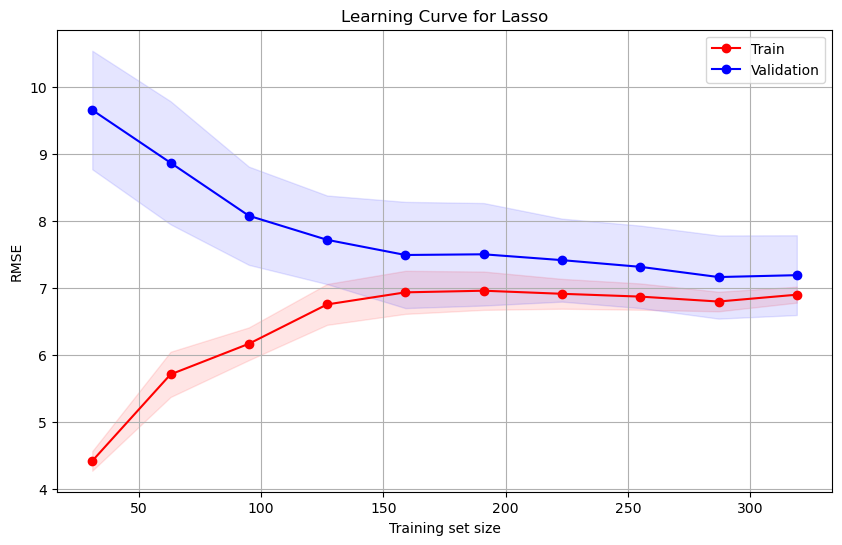

Plotting learning curve for Lasso with alpha=2.0000


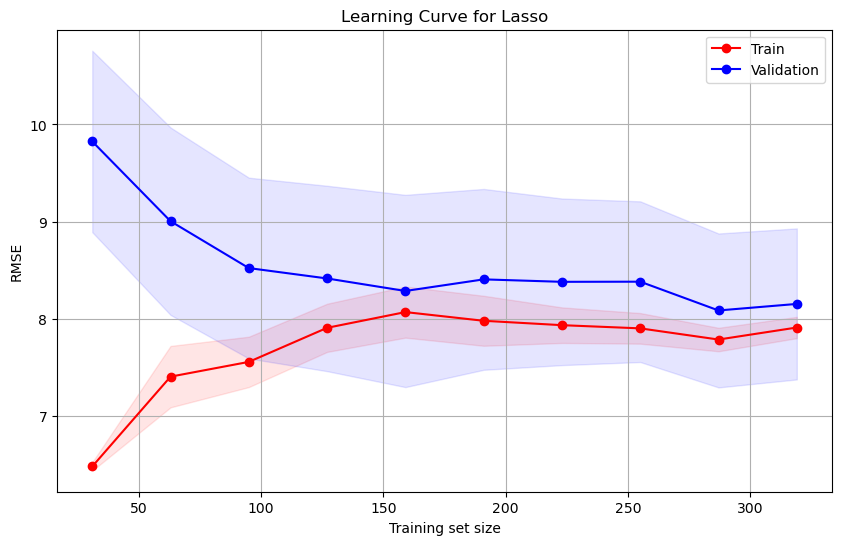

Plotting learning curve for Lasso with alpha=5.0000


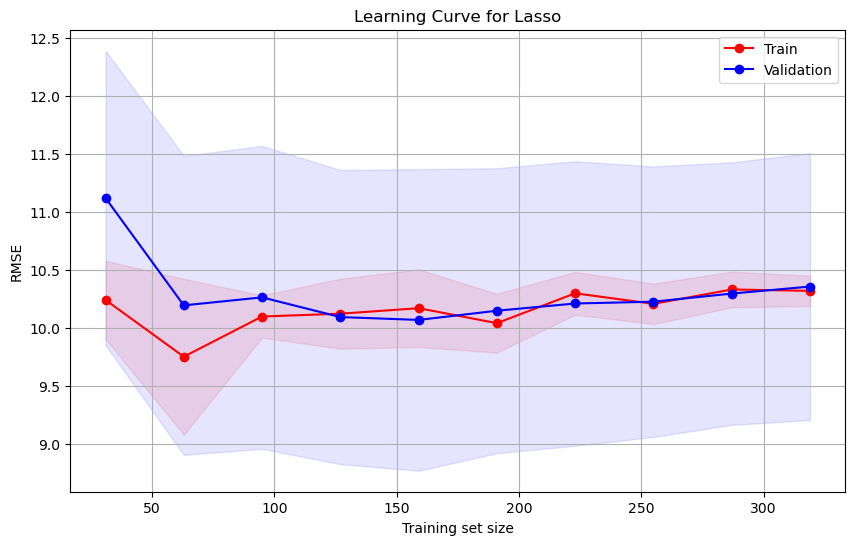

In [65]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import learning_curve

alphas = (0.01, 0.1, 0.5, 0.7, 1, 2, 5)
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=50000, tol=1e-4)
    print(f"Plotting learning curve for Lasso with alpha={alpha:.4f}")
    plot_learning_curve(lasso_model, X_train_with_BMR, y_train_with_BMR)



Low Alpha (e.g., 0.1 or 0.5):
In these cases, the model is using most or all of the features, and the learning curve shows lower training RMSE compared to higher alpha values.
There’s typically a visible gap between training and validation RMSE at low alphas, suggesting the model is learning specific patterns in the training data that don’t generalize well to the validation set. This indicates a potential overfitting issue.

Moderate Alpha (e.g., 1.0):
As alpha increases, the model retains fewer features, and the learning curve starts showing smaller differences between training and validation RMSE. This reduction in the train-validation gap is a sign of improved generalization, as the model is less complex and is relying on only the most important features.
The validation RMSE stabilizes at a lower value compared to lower alphas, showing that the model is generalizing better by focusing only on the most impactful features.

High Alpha (e.g., 2.0 and above):
For higher values of alpha, the training RMSE rises significantly, and more feature coefficients are zeroed out, leaving a very simplified model.
Less Overfitting, Risk of Underfitting. the model becomes too simple, discarding useful information. the validation RMSE increases or plateaus while training RMSE also increases, indicating underfitting, where the model is too simple to capture relevant patterns in the data.


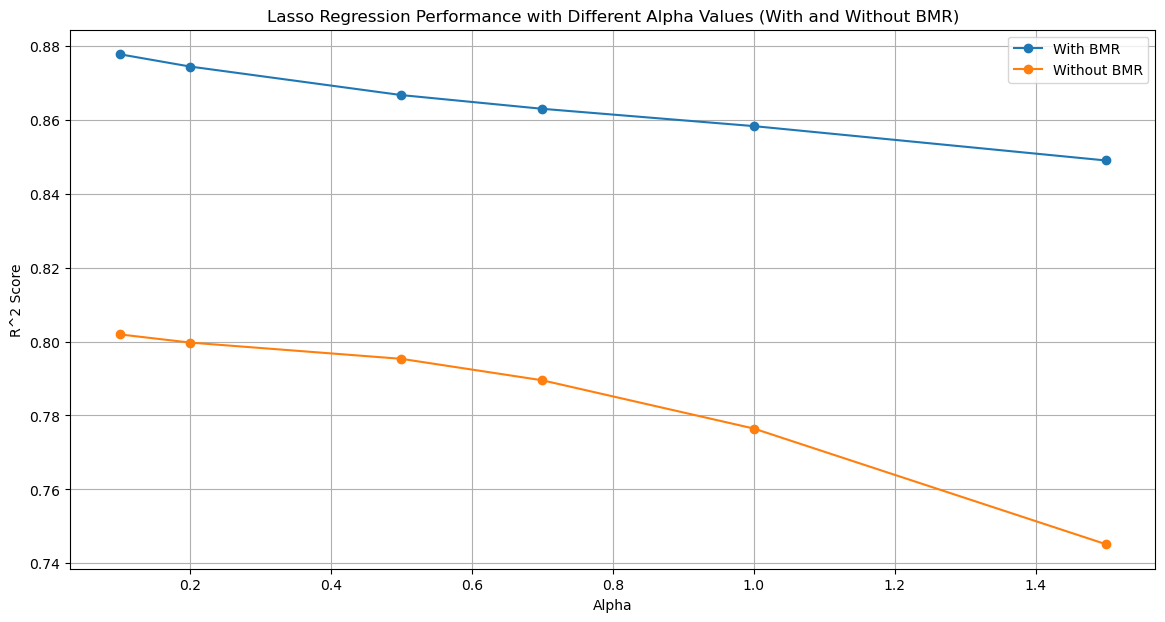

In [66]:
# Using specific alpha values as defined before
alphas = (0.1, 0.2, 0.5, 0.7, 1, 1.5)

# Results for with and without BMR
lasso_results_with_BMR = []
lasso_results_without_BMR = []

# Training and evaluating Lasso model with BMR
for alpha in alphas:
    lasso_model_BMR = Lasso(alpha=alpha, max_iter=50000)
    lasso_model_BMR.fit(X_train_with_BMR, y_train_with_BMR)
    score = lasso_model_BMR.score(X_test_with_BMR, y_test_with_BMR)
    lasso_results_with_BMR.append((alpha, score))

# Training and evaluating Lasso model without BMR
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=50000)
    lasso_model.fit(X_train_without_BMR, y_train_without_BMR)
    score = lasso_model.score(X_test_without_BMR, y_test_without_BMR)
    lasso_results_without_BMR.append((alpha, score))

# Plotting results
plt.figure(figsize=(14, 7))
plt.plot([res[0] for res in lasso_results_with_BMR], [res[1] for res in lasso_results_with_BMR], marker='o', label='With BMR')
plt.plot([res[0] for res in lasso_results_without_BMR], [res[1] for res in lasso_results_without_BMR], marker='o', label='Without BMR')
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.title('Lasso Regression Performance with Different Alpha Values (With and Without BMR)')
plt.legend()
plt.grid(True)
plt.show()


The best generalization performance (i.e., lowest validation RMSE with minimal overfitting, and highest R^2 given the prior 2 conditions) looks like alpha values around 1.0

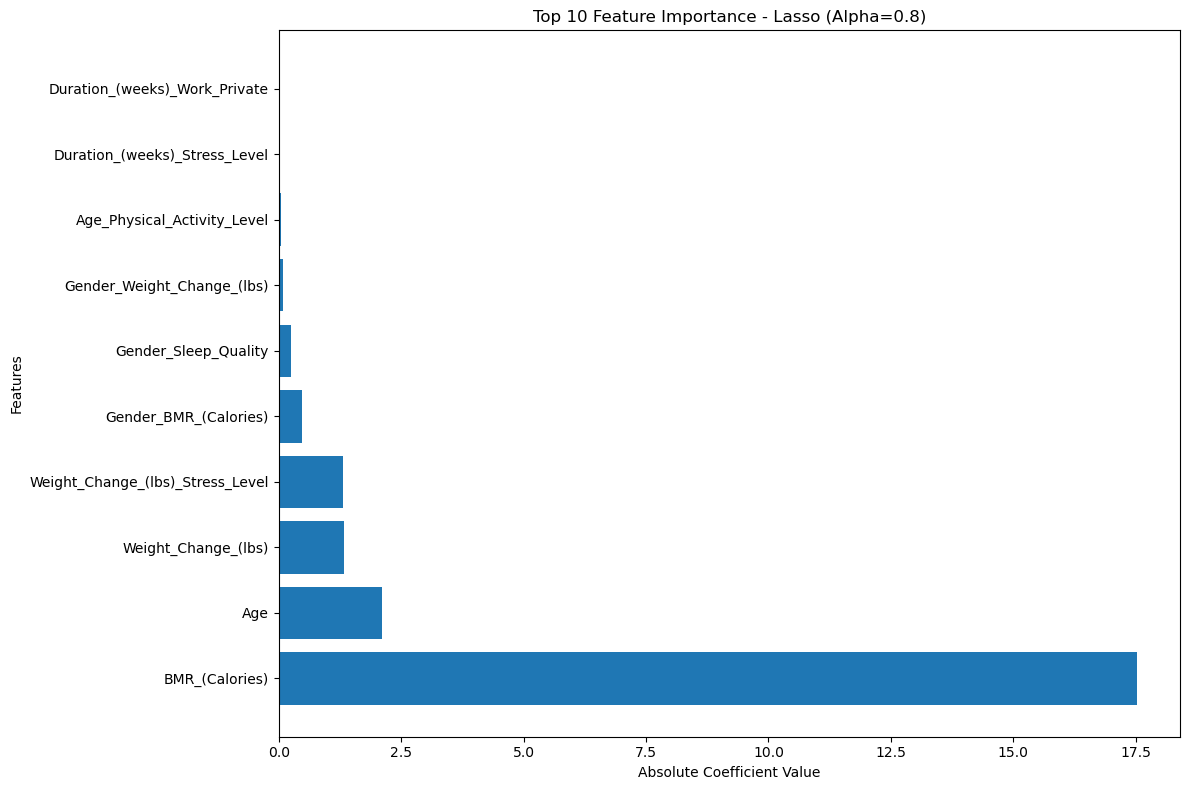

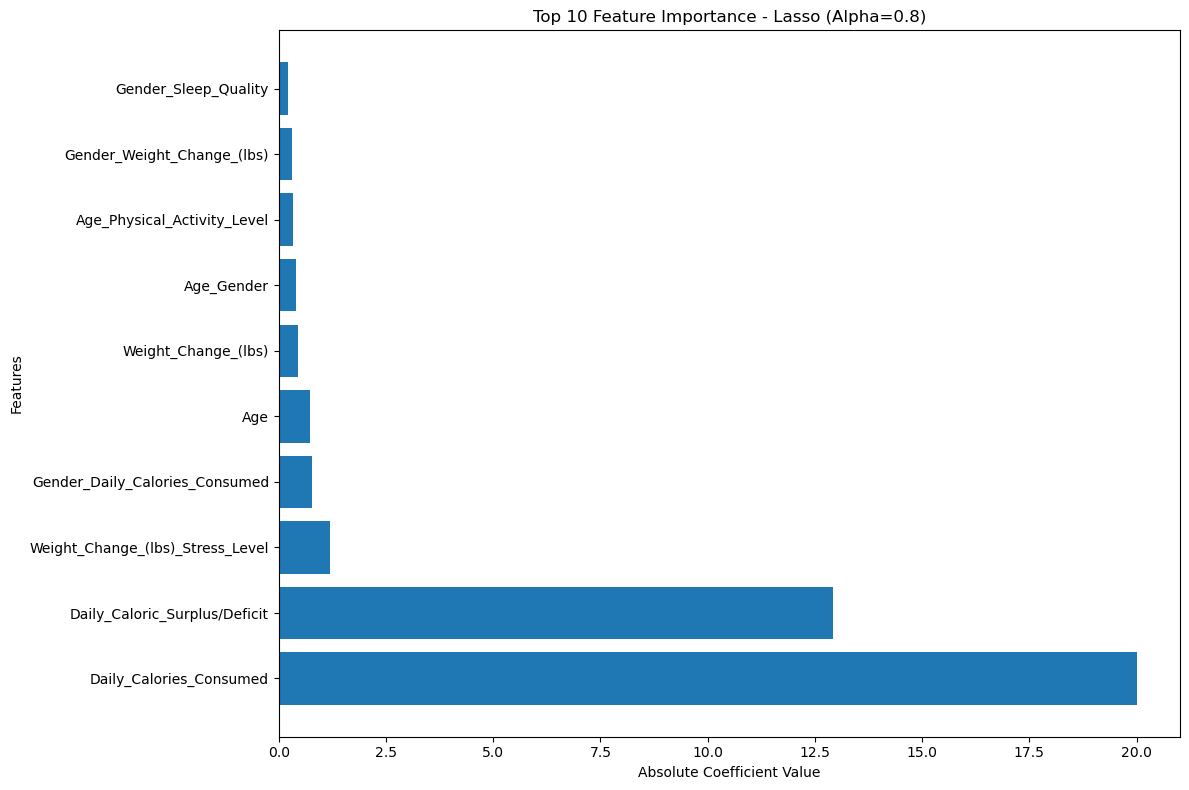

In [67]:
# Plot top features
plot_top_feature_importance(lasso_model_BMR, X_train_with_BMR.columns, 
                          model_name=f'Lasso (Alpha={0.8})', top_n=10)


plot_top_feature_importance(lasso_model, X_train_without_BMR.columns, 
                          model_name=f'Lasso (Alpha={0.8})', top_n=10)

Alpha=0.8 strikes a balance by retaining meaningful features and interactions while setting weaker ones to zero, which simplifies the model and potentially improves generalization.

Without BMR, the model shifts focus to features associated with caloric intake and caloric balance. This shift highlights how Lasso adjusts feature importance depending on available information.

Again, the results are consistent with the other models above. Daily Caloric Surplus/Deficit and Daily Calories Consumed become critical when BMR isn’t available, indicating that these caloric metrics are directly tied to weight management.

If we compare a Lasso model trained with batch gradient descent to a plain linear regression model trained with mini-batch gradient descent, Lasso is generally better for high-dimensional or complex datasets. Lasso’s feature selection ability helps prevent overfitting by ignoring irrelevant or weak features. (if used on an already reduced dataset, a plain batch gradient wouldn't work differently since there is no feature selection involved)

## 3g) With the complete dataset generated above (dataset_augmented), we train a Ridge Regression model identifying the best value of the regularization coefficient alpha that allows the model to achieve the best generalization performances. Then we evaluate the generalization performances of the model.


Plotting learning curve for Ridge with alpha=0.0100


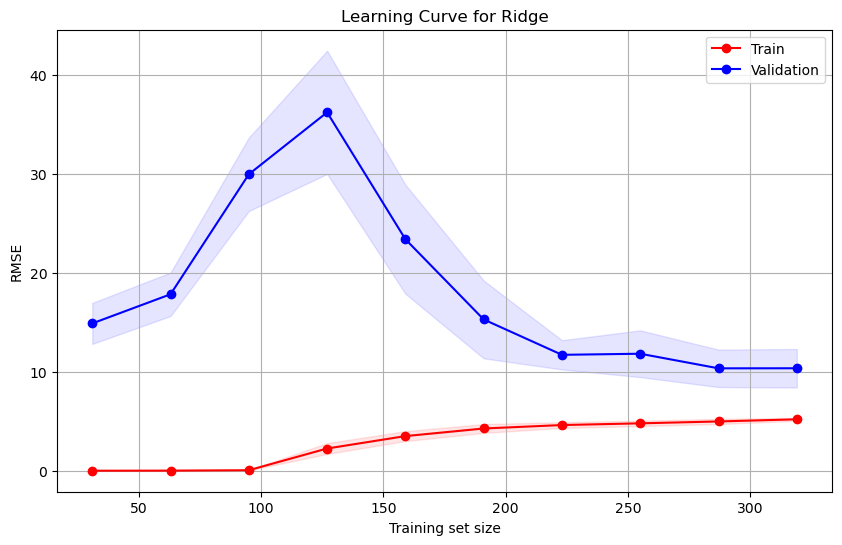

Plotting learning curve for Ridge with alpha=0.1000


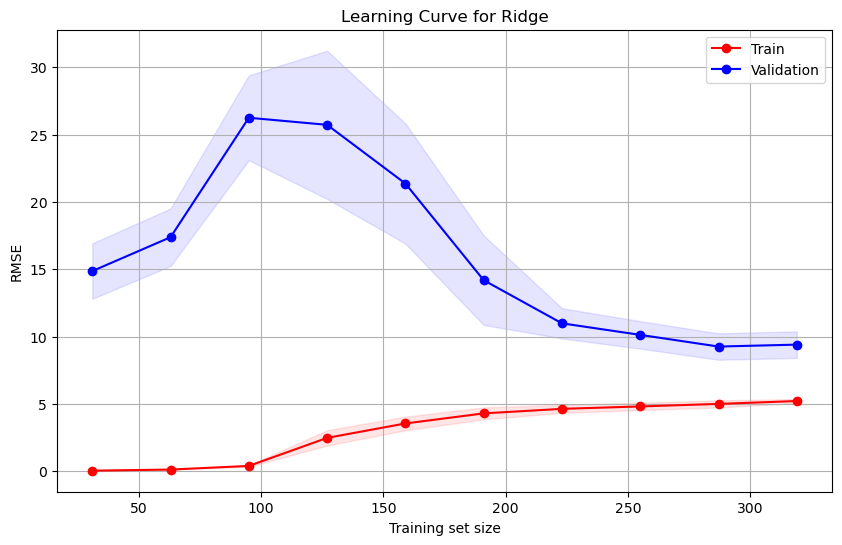

Plotting learning curve for Ridge with alpha=0.5000


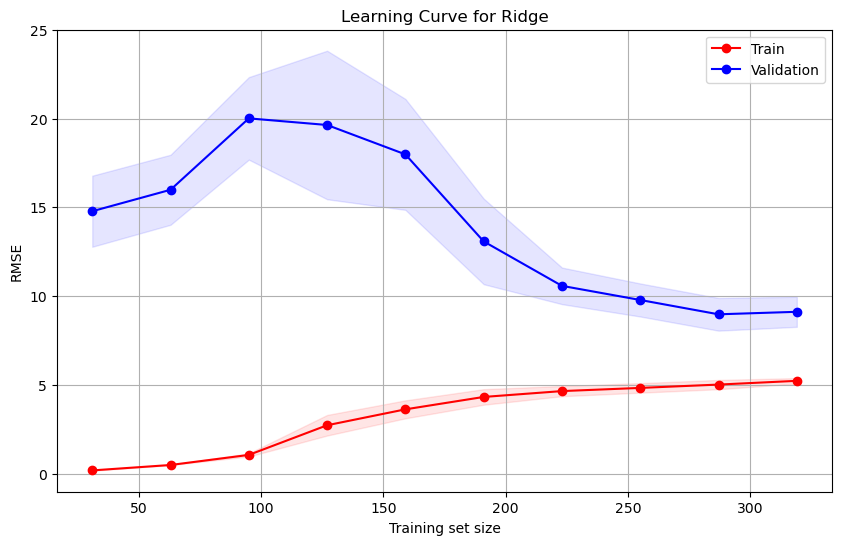

Plotting learning curve for Ridge with alpha=1.0000


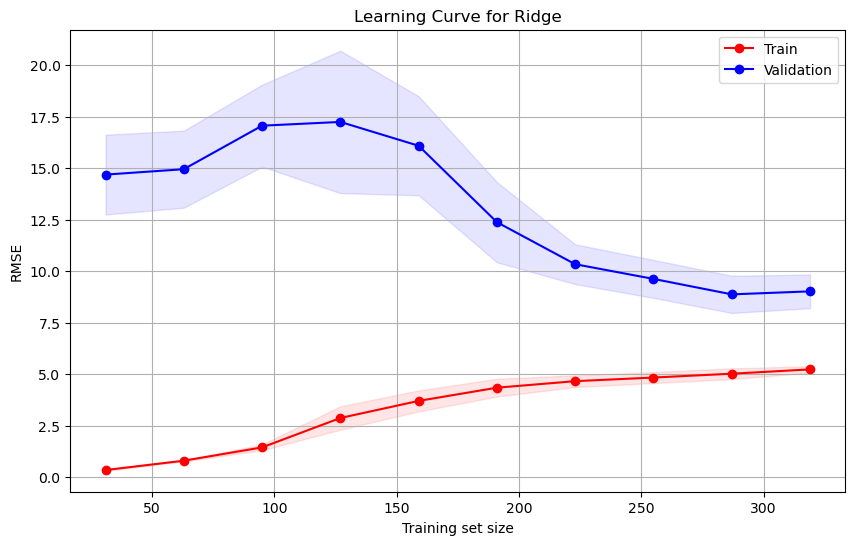

Plotting learning curve for Ridge with alpha=10.0000


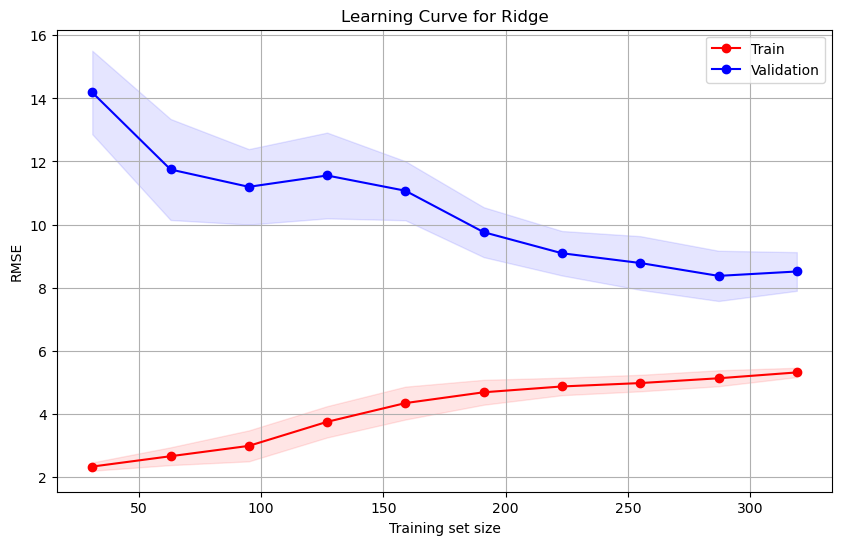

Plotting learning curve for Ridge with alpha=50.0000


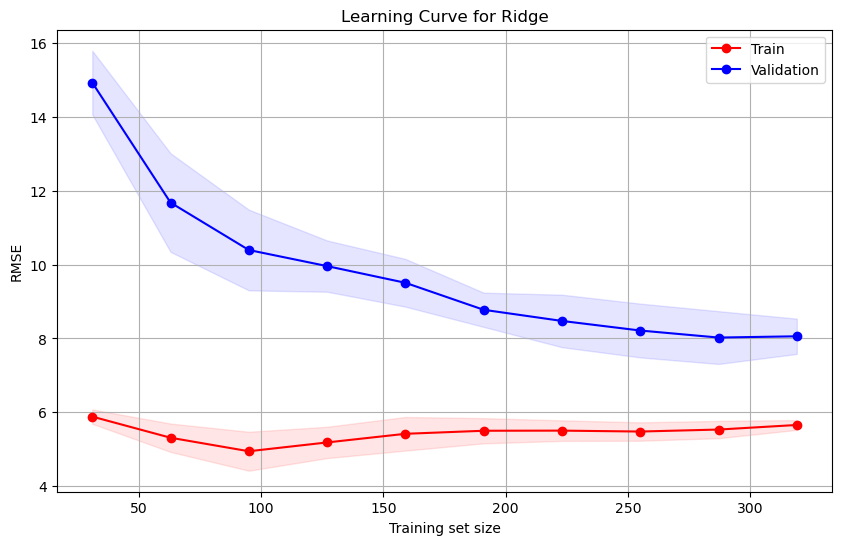

Plotting learning curve for Ridge with alpha=100.0000


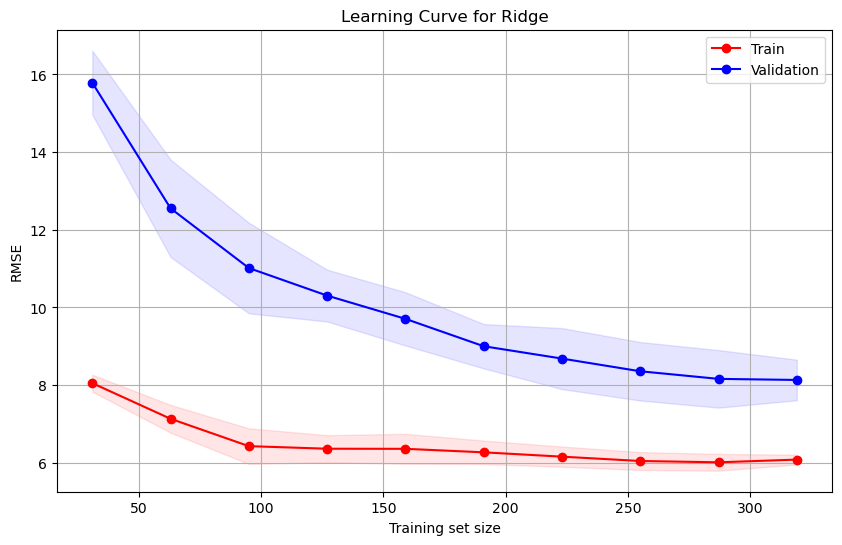

Plotting learning curve for Ridge with alpha=150.0000


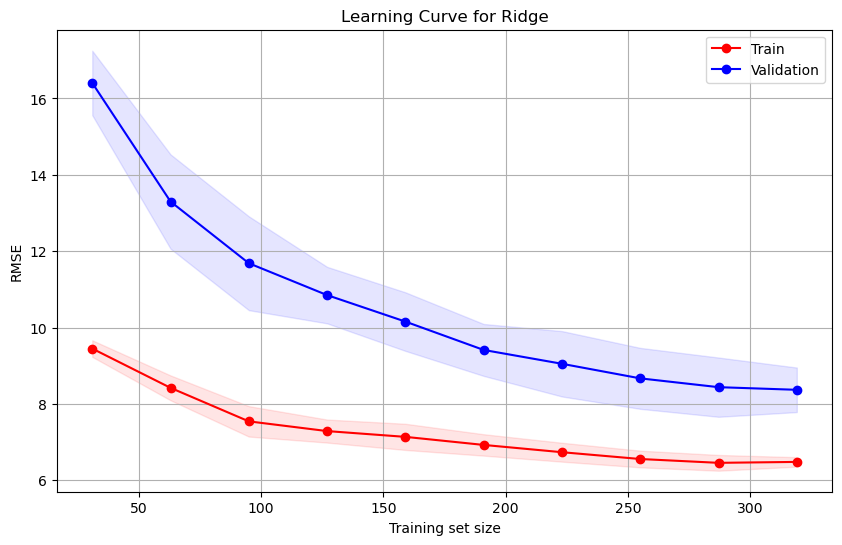

In [68]:
from sklearn.linear_model import Ridge

alphas = (0.01, 0.1, 0.5, 1, 10, 50, 100, 150)
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha, max_iter=50000, tol=1e-4)
    print(f"Plotting learning curve for Ridge with alpha={alpha:.4f}")
    plot_learning_curve(ridge_model, X_train_with_BMR, y_train_with_BMR)

With very small alpha values, the Ridge model behaves more like a simple linear regression with minimal regularization.
The training RMSE is low, however, the validationstarts high and takes time to settle, indicating that the model may not generalize well.
This setup can lead to overfitting because the model isn't constrained enough, and it may "memorize" the training data rather than learn a more general pattern

With moderate regularization, like 0.1 to 1, the model starts to balance between fitting the training data and generalizing to the validation set.

With a high alpha like 10 we can see that the training RMSE is consistently low, the regularization is strong enough and the model becomes less sensitive to variations in the training data, leading to a stable training curve. The model generalizes well since the gap is pretty narrow still.

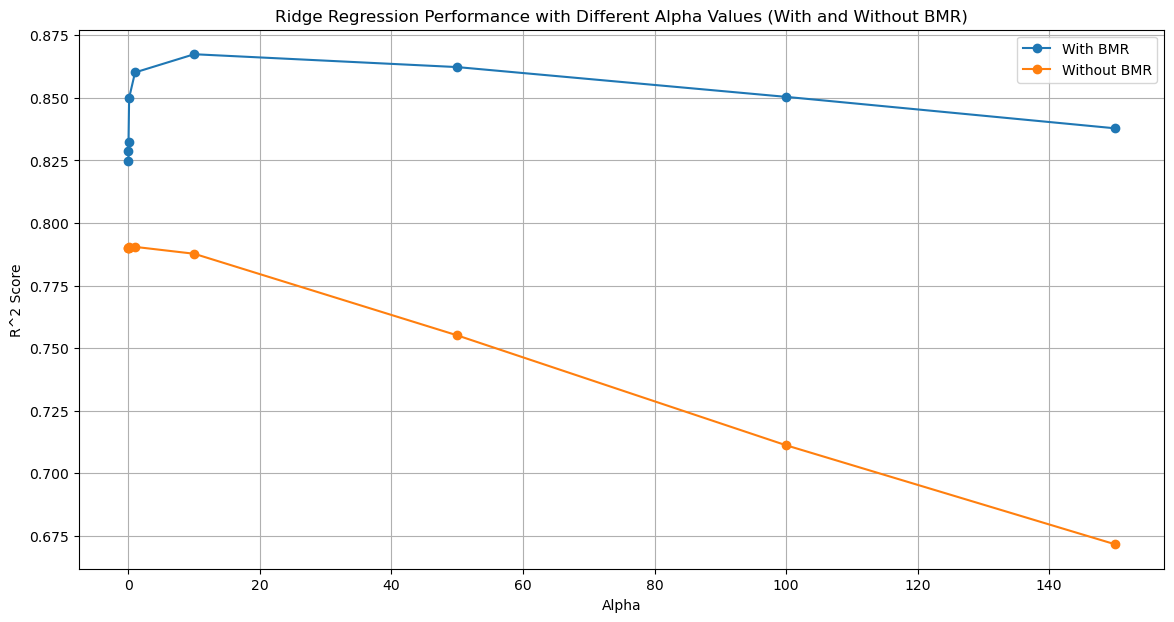

In [69]:



# Define specific alpha values for Ridge Regression
alphas = (0.001, 0.005, 0.010, 0.1, 1, 10, 50, 100, 150)

# Results for with and without BMR
ridge_results_with_BMR = []
ridge_results_without_BMR = []

# Training and evaluating Ridge model with BMR
for alpha in alphas:
    ridge_model_BMR = Ridge(alpha=alpha, max_iter=50000)
    ridge_model_BMR.fit(X_train_with_BMR, y_train_with_BMR)
    score = ridge_model_BMR.score(X_test_with_BMR, y_test_with_BMR)
    ridge_results_with_BMR.append((alpha, score))

# Training and evaluating Ridge model without BMR
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha, max_iter=50000)
    ridge_model.fit(X_train_without_BMR, y_train_without_BMR)
    score = ridge_model.score(X_test_without_BMR, y_test_without_BMR)
    ridge_results_without_BMR.append((alpha, score))

# Plotting results for Ridge Regression performance
plt.figure(figsize=(14, 7))
plt.plot([res[0] for res in ridge_results_with_BMR], [res[1] for res in ridge_results_with_BMR], marker='o', label='With BMR')
plt.plot([res[0] for res in ridge_results_without_BMR], [res[1] for res in ridge_results_without_BMR], marker='o', label='Without BMR')
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.title('Ridge Regression Performance with Different Alpha Values (With and Without BMR)')
plt.legend()
plt.grid(True)
plt.show()




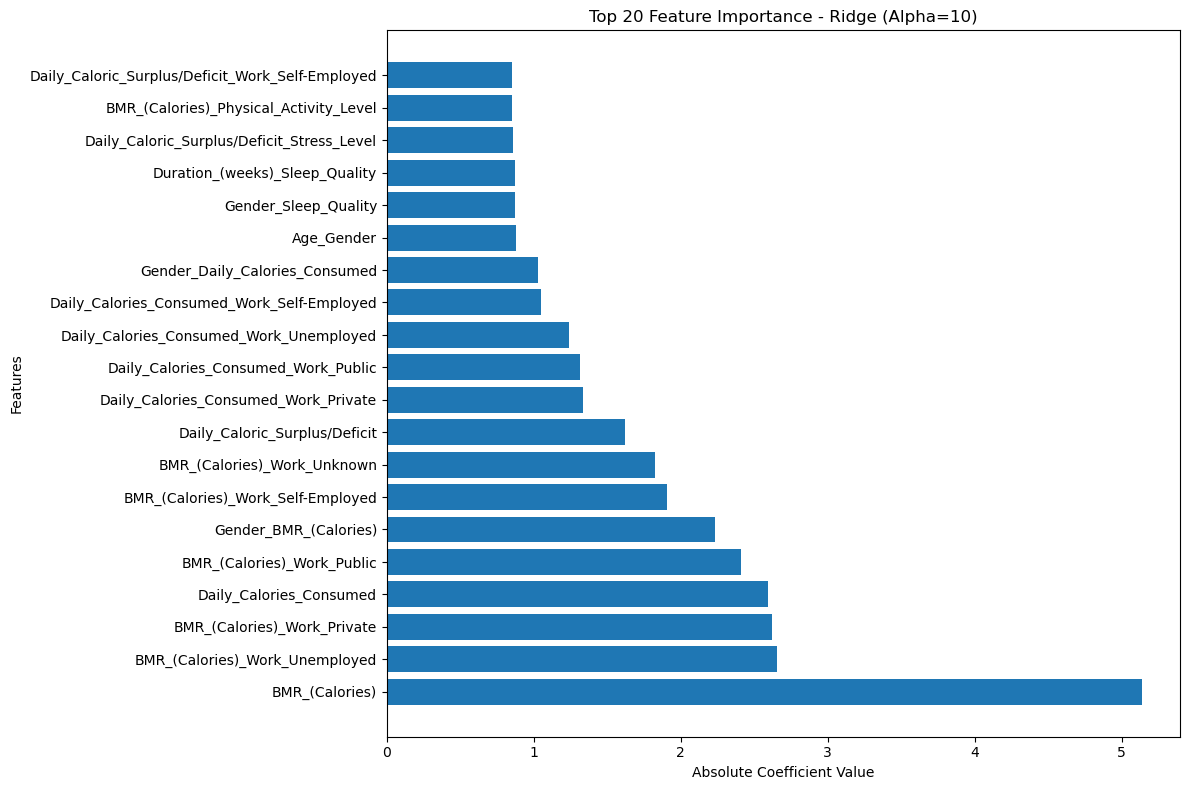

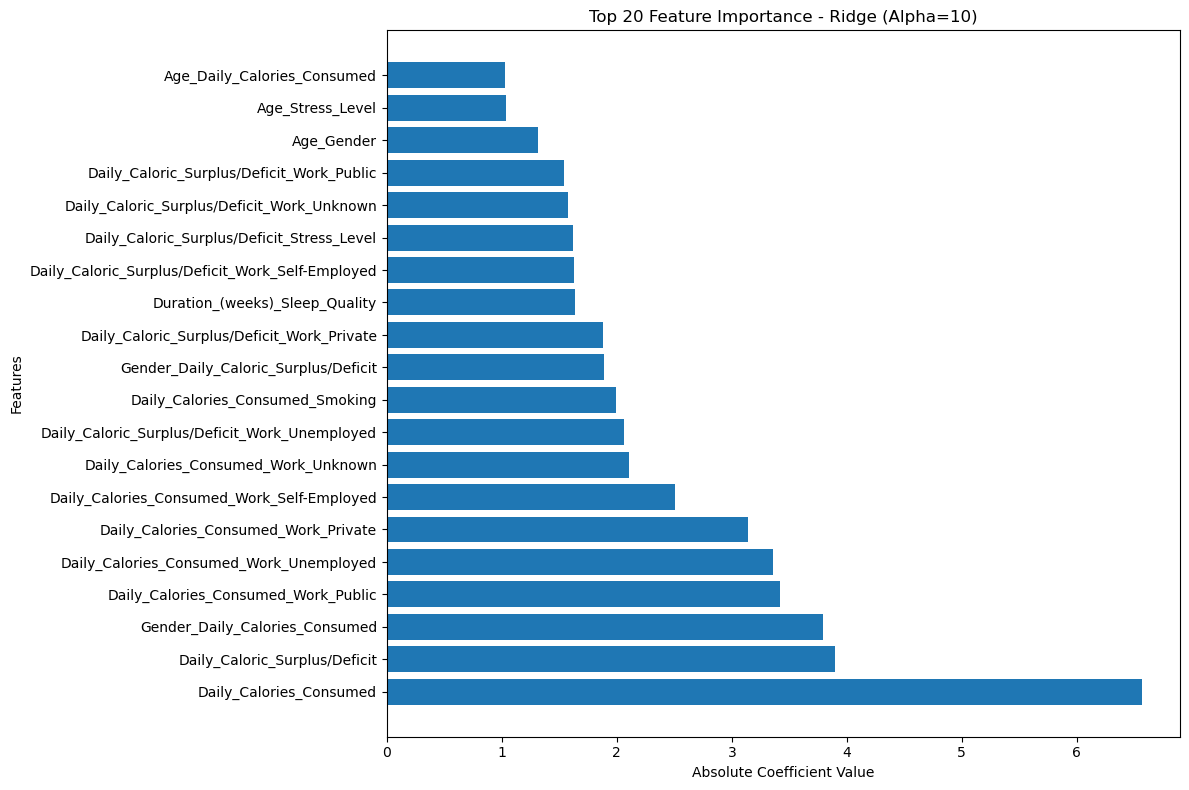

In [70]:
# Plot top features
plot_top_feature_importance(ridge_model_BMR, X_train_with_BMR.columns, 
                          model_name=f'Ridge (Alpha={10})', top_n=20)


plot_top_feature_importance(ridge_model, X_train_without_BMR.columns, 
                          model_name=f'Ridge (Alpha={10})', top_n=20)

This spread shows that Ridge, even with moderate regularization, keeps features with moderate coefficients rather than shrinking them to near-zero, which aligns with Ridge’s property of balancing all predictors rather than removing them as in Lasso.

Like in the Lasso, the importance of BMR is substituted by Daily Calories when  missing. What is suprising is that now the Work variable gained much influence as an interaction term paired with the main influential features.

The categorical values of the Work feature in dataset_reduced were broadly categorized,  without details about the specific nature of the job. In line with this, different feature selection methods did not highlight Work categories as highly important. However, Ridge regression, which retains all features and explores interactions, assigned some importance to interactions . These interactions might reflect indirect correlations rather than true lifestyle differences tied to work environment. Therefore, while Work interactions appeared moderately relevant in the Ridge model, these findings should be viewed cautiously.


# 4. Now, let’s stratify the problem according to gender. Using the dataset_reduced build two different supervised systems (one considering only the male subjects and one considering only the female subjects) based on Linear Regression which are capable of predicting the Final Weight (lbs) under the two conditions specified in the preamble. We optimize, per each system, the number of iterations of the learning procedure and the learning rate. Then we plot the related learning curves and we compare them.


In [71]:
# gender = 0 --> F,  gender = 1 --> M


dataset_reduced.head()


BMR  Daily Calories Consumed  Daily Caloric Surplus/Deficit       Age  \
0 -0.801327                -0.183516                       0.549898 -0.397961   
1  1.299901                 0.644014                      -0.418486 -1.886392   
2 -0.859021                -0.491584                       0.181206  0.718363   
3 -0.203374                -0.406146                      -0.360415 -0.025853   
4 -1.140115                -0.624983                       0.279128  0.222219   

   Sleep Quality  Stress Level  Weight Change  Smoking  Gender  \
0       2.914605      0.162118      -0.377834        0       0   
1      -0.315161     -0.419600       0.149909        0       1   
2      -0.315161      0.162118       0.929860        0       0   
3      -0.315161      0.162118       0.058064        0       1   
4      -0.315161     -0.419600       0.240296        0       0   

   Final Weight (lbs)  
0              139.60  
1              192.53  
2              156.07  
3              169.13  
4              150.17

In [72]:
# Separate datasets by gender
dataset_male = dataset_reduced[dataset_reduced['Gender'] == 1]  # Assuming 1 is the encoded label for male
dataset_female = dataset_reduced[dataset_reduced['Gender'] == 0]  # Assuming 0 is the encoded label for female

# Drop the 'Gender' column as it's not needed for prediction
dataset_male = dataset_male.drop(columns=['Gender'])
dataset_female = dataset_female.drop(columns=['Gender'])

# Condition 1: With BMR
dataset_male_with_BMR = dataset_male  # Keep BMR in the features
dataset_female_with_BMR = dataset_female  # Keep BMR in the features

# Condition 2: Without BMR (drop BMR column)
dataset_male_without_BMR = dataset_male.drop(columns=['BMR'])
dataset_female_without_BMR = dataset_female.drop(columns=['BMR'])


In [73]:
# Define target variable for both genders
y_male = dataset_male['Final Weight (lbs)']
y_female = dataset_female['Final Weight (lbs)']

# Male - With BMR
X_male_with_BMR = dataset_male_with_BMR.drop(columns=['Final Weight (lbs)'])
X_train_male_with_BMR, X_test_male_with_BMR, y_train_male, y_test_male = train_test_split(
    X_male_with_BMR, y_male, test_size=0.3, random_state=42
)

# Male - Without BMR
X_male_without_BMR = dataset_male_without_BMR.drop(columns=['Final Weight (lbs)'])
X_train_male_without_BMR, X_test_male_without_BMR, _, _ = train_test_split(
    X_male_without_BMR, y_male, test_size=0.3, random_state=42
)

# Female - With BMR
X_female_with_BMR = dataset_female_with_BMR.drop(columns=['Final Weight (lbs)'])
X_train_female_with_BMR, X_test_female_with_BMR, y_train_female, y_test_female = train_test_split(
    X_female_with_BMR, y_female, test_size=0.3, random_state=42
)

# Female - Without BMR
X_female_without_BMR = dataset_female_without_BMR.drop(columns=['Final Weight (lbs)'])
X_train_female_without_BMR, X_test_female_without_BMR, _, _ = train_test_split(
    X_female_without_BMR, y_female, test_size=0.3, random_state=42
)


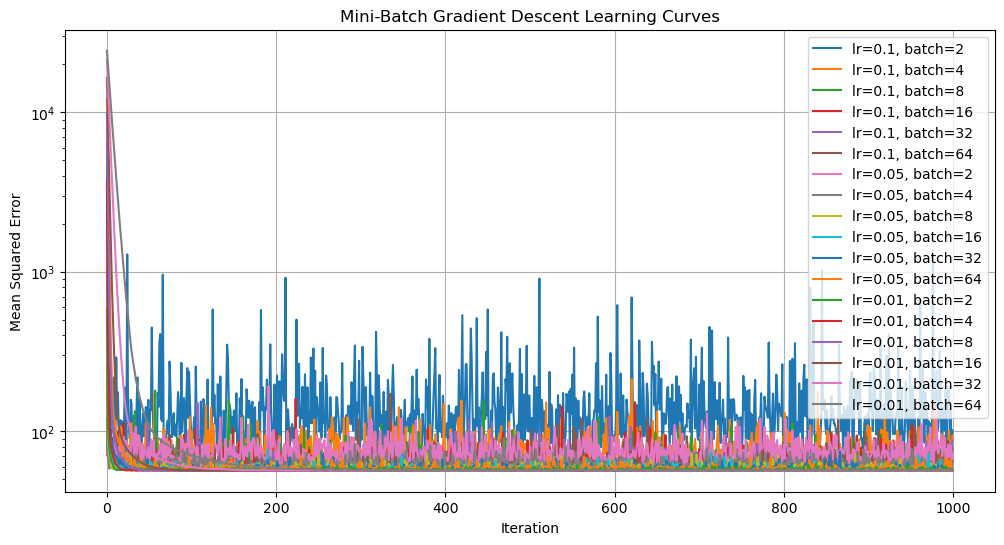


Best Model Results:
Learning Rate: 0.05
Batch Size: 4
Iterations to Converge: 1000
MSE: 52.8636
R2 Score: 0.8696


In [74]:
learning_rates = [0.1, 0.05, 0.01]
batch_sizes = [2, 4, 8, 16, 32, 64]
max_iterations = 1000

#mini-batch gradient descent (MALE BMR)
minibatch_results = evaluate_models(X_train_male_with_BMR, X_test_male_with_BMR, y_train_male, y_test_male,
                                  learning_rates=learning_rates, batch_sizes=batch_sizes,
                                  max_iterations=max_iterations,
                                    verbose=False)
plot_learning_curves(minibatch_results, 'Mini-Batch Gradient Descent Learning Curves', batch_mode=True)


print_best_results(minibatch_results)

# Extract the best model based on some criterion (e.g., lowest MSE)
best_minibatch_model_with_BMR_male = min(minibatch_results, key=lambda x: x['mse'])['model']

# Make predictions using the best batch models
y_pred_minibatch_with_BMR_male = best_minibatch_model_with_BMR_male.predict(X_test_male_with_BMR)


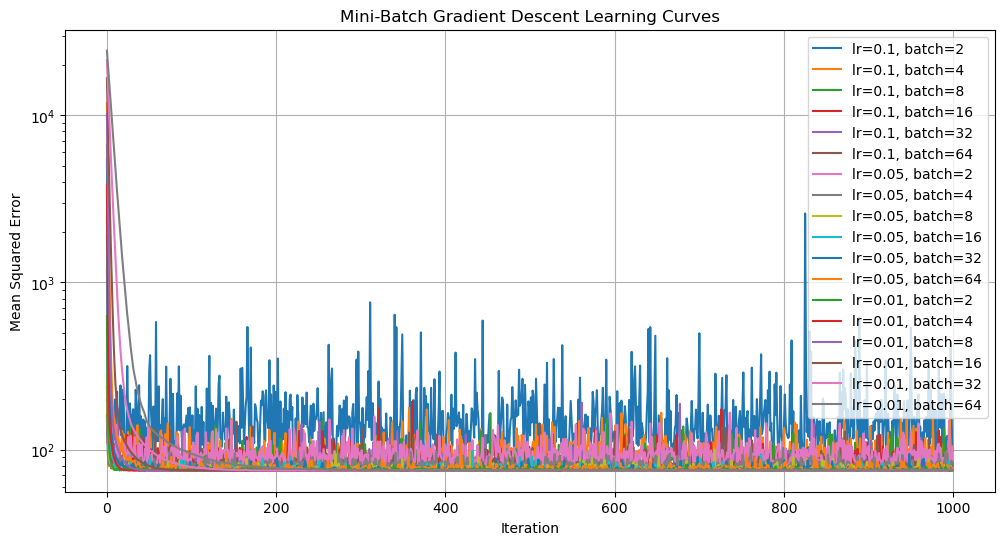


Best Model Results:
Learning Rate: 0.1
Batch Size: 2
Iterations to Converge: 1000
MSE: 68.8977
R2 Score: 0.8300


In [75]:
#mini-batch gradient descent (MALE no-BMR)

minibatch_results = evaluate_models(X_train_male_without_BMR, X_test_male_without_BMR, y_train_male, y_test_male,
                                  learning_rates=learning_rates, batch_sizes=batch_sizes,
                                  max_iterations=max_iterations,
                                    verbose=False)
plot_learning_curves(minibatch_results, 'Mini-Batch Gradient Descent Learning Curves', batch_mode=True)


print_best_results(minibatch_results)

# Extract the best model based on some criterion (e.g., lowest MSE)
best_minibatch_model_without_BMR_male = min(minibatch_results, key=lambda x: x['mse'])['model']

# Make predictions using the best batch models
y_pred_minibatch_without_BMR_male = best_minibatch_model_without_BMR_male.predict(X_test_male_without_BMR)


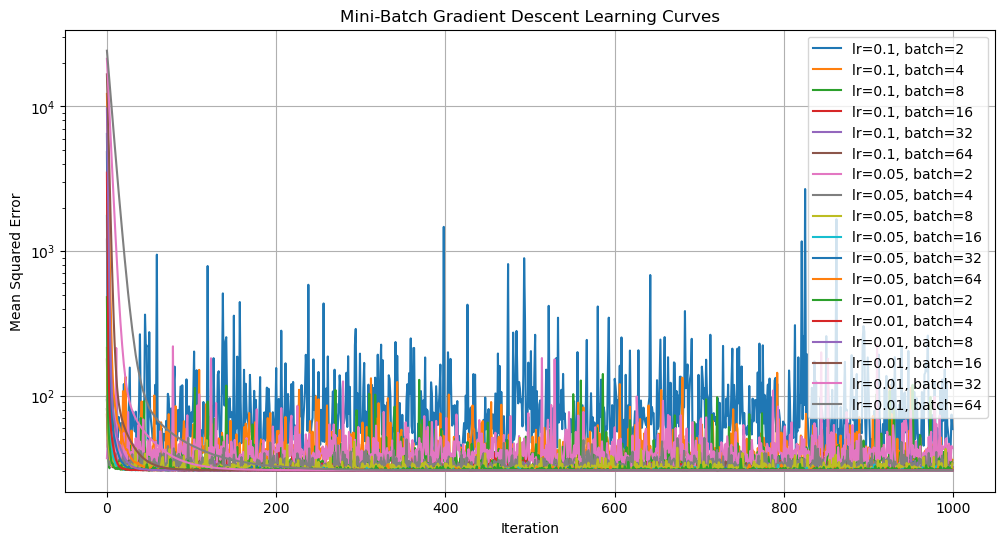


Best Model Results:
Learning Rate: 0.1
Batch Size: 16
Iterations to Converge: 1000
MSE: 48.2766
R2 Score: 0.8367


In [76]:

#mini-batch gradient descent (FEMALE BMR)

minibatch_results = evaluate_models(X_train_female_with_BMR, X_test_female_with_BMR, y_train_female, y_test_female,
                                  learning_rates=learning_rates, batch_sizes=batch_sizes,
                                  max_iterations=max_iterations,
                                    verbose=False)
plot_learning_curves(minibatch_results, 'Mini-Batch Gradient Descent Learning Curves', batch_mode=True)


print_best_results(minibatch_results)

# Extract the best model based on some criterion (e.g., lowest MSE)
best_minibatch_model_with_BMR_female = min(minibatch_results, key=lambda x: x['mse'])['model']

# Make predictions using the best batch models
y_pred_minibatch_with_BMR_female = best_minibatch_model_with_BMR_female.predict(X_test_female_with_BMR)


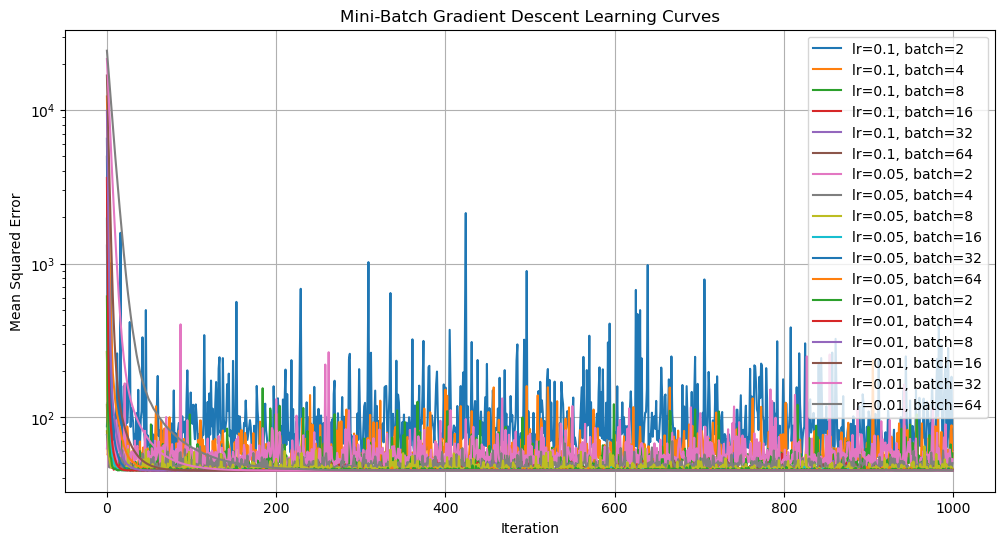


Best Model Results:
Learning Rate: 0.01
Batch Size: 2
Iterations to Converge: 1000
MSE: 79.8157
R2 Score: 0.7301


In [77]:
# For mini-batch gradient descent
minibatch_results = evaluate_models(X_train_female_without_BMR, X_test_female_without_BMR, y_train_female, y_test_female,
                                  learning_rates=learning_rates, batch_sizes=batch_sizes,
                                  max_iterations=max_iterations,
                                    verbose=False)
plot_learning_curves(minibatch_results, 'Mini-Batch Gradient Descent Learning Curves', batch_mode=True)


print_best_results(minibatch_results)


# Extract the best model based on some criterion (e.g., lowest MSE)
best_minibatch_model_without_BMR_female = min(minibatch_results, key=lambda x: x['mse'])['model']

# Make predictions using the best batch models
y_pred_minibatch_without_BMR_female = best_minibatch_model_without_BMR_female.predict(X_test_female_without_BMR)


(M - BMR):
Best Model Results:
Learning Rate: 0.01
Batch Size: 4
Iterations to Converge: 1000
MSE: 53.4898
R2 Score: 0.8680

(M no-BMR):
Best Model Results:
Learning Rate: 0.1
Batch Size: 32
Iterations to Converge: 1000
MSE: 63.8414
R2 Score: 0.8425


(F - BMR)
Best Model Results:
Learning Rate: 0.1
Batch Size: 64
Iterations to Converge: 1000
MSE: 47.8449
R2 Score: 0.8382

(F - No BMR)
Best Model Results:
Learning Rate: 0.01
Batch Size: 2
Iterations to Converge: 1000
MSE: 79.1663
R2 Score: 0.7323


- Including BMR improved model performance, significantly  for women, less for men
- Men achieved a higher R² overall, suggesting that the included features (especially BMR) may be more predictive of final weight in males than in women under these conditions.
- Men tended to perform well with smaller batch sizes and moderate learning rates, while women saw improvements with larger batch sizes, especially when BMR was included. The variability in optimal batch sizes might reflect different noise tolerances in each gender’s data structure.

In [78]:
# Call the function for each set of predictions
results_4_with_BMR_m = X_test_male_with_BMR.copy()
results_4_with_BMR_m['Final Weight (lbs)'] = y_test_male
results_4_with_BMR_m['Predicted Target'] = y_pred_minibatch_with_BMR_male

# Call the function for each set of predictions
results_4_without_BMR_m = X_test_male_without_BMR.copy()
results_4_without_BMR_m['Final Weight (lbs)'] = y_test_male
results_4_without_BMR_m['Predicted Target'] = y_pred_minibatch_without_BMR_male


# Call the function for each set of predictions
results_4_with_BMR_f = X_test_female_with_BMR.copy()
results_4_with_BMR_f['Final Weight (lbs)'] = y_test_female
results_4_with_BMR_f['Predicted Target'] = y_pred_minibatch_with_BMR_female

# Call the function for each set of predictions
results_4_without_BMR_f = X_test_female_without_BMR.copy()
results_4_without_BMR_f['Final Weight (lbs)'] = y_test_female
results_4_without_BMR_f['Predicted Target'] = y_pred_minibatch_without_BMR_female


# 5. For this task, measure how well each different approach developed above on dataset_reduced is capable of predicting the Final Weight (lbs) (under the conditions specified in the preamble) over the two genders present in the dataset. The performances to compare are the ones calculated only on test samples to each specific gender. Visualize the obtained results.

For the completition of this task, throughout alle task 3 and 4, i gathered the test datasets for all the methods i imlemented, storing the predicted target so that i can make perfomance comparison between them all. I'll divide the datasets of task 3 based on gender, so that the perfomance are measured based on that.

In [79]:
results_3a_with_BMR[results_3a_with_BMR['Gender'] == (0)] #test set of 3a for fem.

BMR  Daily Calories Consumed  Daily Caloric Surplus/Deficit  \
70  -1.383730                -0.418600                       0.810355   
131  0.471650                -1.325689                      -2.314038   
362  0.600834                -0.177057                      -0.852312   
188 -0.519555                -1.336491                      -1.331206   
250 -1.059176                -0.719225                       0.067231   
..        ...                      ...                            ...   
322 -0.398625                -0.334321                      -0.064401   
357  0.582613                -0.273877                      -0.968293   
514 -0.211747                -0.363080                      -0.292471   
69  -0.477172                -1.907911                      -2.165830   
333 -0.390531                -1.006702                      -1.004412   

          Age  Sleep Quality  Stress Level  Weight Change  Smoking  Gender  \
70   0.718363       0.761428      1.325554       0.603301        0       0   
131  0.470291       0.761428     -0.419600       1.015873        0       0   
362  0.098183       0.761428     -0.419600       0.407949        0       0   
188  0.718363       0.761428     -1.001318       0.660157        1       0   
250  1.338543       0.761428      1.907272       2.520377        1       0   
..        ...            ...           ...            ...      ...     ...   
322  0.222219      -1.391749      0.743836      -0.045542        0       0   
357  0.098183      -0.315161      0.162118      -0.651910        0       0   
514  0.718363       0.761428     -1.001318       0.603301        0       0   
69   0.470291      -0.315161     -0.419600       2.198191        0       0   
333 -1.266213      -0.315161      1.325554       0.007039        0       0   

     Final Weight (lbs)  Predicted Target  
70               138.03        145.299526  
131              190.93        184.678573  
362              192.83        183.774157  
188              167.83        163.805916  
250              164.53        159.588928  
..                  ...               ...  
322              164.63        160.730626  
357              189.50        178.873240  
514              166.30        170.894296  
69               175.20        169.117673  
333              148.87        155.001429  

[86 rows x 11 columns]

In [80]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def calculate_metrics(data, gender_value):
    subset = data[data['Gender'] == gender_value]
    r2 = r2_score(subset['Final Weight (lbs)'], subset['Predicted Target'])
    rmse = np.sqrt(mean_squared_error(subset['Final Weight (lbs)'], subset['Predicted Target']))
    return r2, rmse

# For results_3a_with_BMR
print("Results for 3a with BMR:")
r2_f_3a_with_BMR, rmse_f_3a_with_BMR = calculate_metrics(results_3a_with_BMR, 0)
r2_m_3a_with_BMR, rmse_m_3a_with_BMR = calculate_metrics(results_3a_with_BMR, 1)
print(f"Female R^2: {r2_f_3a_with_BMR}, Female RMSE: {rmse_f_3a_with_BMR}")
print(f"Male R^2: {r2_m_3a_with_BMR}, Male RMSE: {rmse_m_3a_with_BMR}")

print()

# For results_3b_with_BMR
print("Results for 3b with BMR:")
r2_f_3b_with_BMR, rmse_f_3b_with_BMR = calculate_metrics(results_3b_with_BMR, 0)
r2_m_3b_with_BMR, rmse_m_3b_with_BMR = calculate_metrics(results_3b_with_BMR, 1)
print(f"Female R^2: {r2_f_3b_with_BMR}, Female RMSE: {rmse_f_3b_with_BMR}")
print(f"Male R^2: {r2_m_3b_with_BMR}, Male RMSE: {rmse_m_3b_with_BMR}")

print()

# For results_3c_with_BMR
print("Results for 3c with BMR:")
r2_f_3c_with_BMR, rmse_f_3c_with_BMR = calculate_metrics(results_3c_with_BMR, 0)
r2_m_3c_with_BMR, rmse_m_3c_with_BMR = calculate_metrics(results_3c_with_BMR, 1)
print(f"Female R^2: {r2_f_3c_with_BMR}, Female RMSE: {rmse_f_3c_with_BMR}")
print(f"Male R^2: {r2_m_3c_with_BMR}, Male RMSE: {rmse_m_3c_with_BMR}")

print()

# For results_3a_without_BMR
print("Results for 3a without BMR:")
r2_f_3a_without_BMR, rmse_f_3a_without_BMR = calculate_metrics(results_3a_without_BMR, 0)
r2_m_3a_without_BMR, rmse_m_3a_without_BMR = calculate_metrics(results_3a_without_BMR, 1)
print(f"Female R^2: {r2_f_3a_without_BMR}, Female RMSE: {rmse_f_3a_without_BMR}")
print(f"Male R^2: {r2_m_3a_without_BMR}, Male RMSE: {rmse_m_3a_without_BMR}")

print()

# For results_3b_without_BMR
print("Results for 3b without BMR:")
r2_f_3b_without_BMR, rmse_f_3b_without_BMR = calculate_metrics(results_3b_without_BMR, 0)
r2_m_3b_without_BMR, rmse_m_3b_without_BMR = calculate_metrics(results_3b_without_BMR, 1)
print(f"Female R^2: {r2_f_3b_without_BMR}, Female RMSE: {rmse_f_3b_without_BMR}")
print(f"Male R^2: {r2_m_3b_without_BMR}, Male RMSE: {rmse_m_3b_without_BMR}")

print()

# For results_3c_without_BMR
print("Results for 3c without BMR:")
r2_f_3c_without_BMR, rmse_f_3c_without_BMR = calculate_metrics(results_3c_without_BMR, 0)
r2_m_3c_without_BMR, rmse_m_3c_without_BMR = calculate_metrics(results_3c_without_BMR, 1)
print(f"Female R^2: {r2_f_3c_without_BMR}, Female RMSE: {rmse_f_3c_without_BMR}")
print(f"Male R^2: {r2_m_3c_without_BMR}, Male RMSE: {rmse_m_3c_without_BMR}")


Results for 3a with BMR:
Female R^2: 0.9027717832016188, Female RMSE: 6.15761900911098
Male R^2: 0.8106089692154137, Male RMSE: 8.158521527348219

Results for 3b with BMR:
Female R^2: 0.902673280926119, Female RMSE: 6.160737373100005
Male R^2: 0.8108137890119524, Male RMSE: 8.154108755671256

Results for 3c with BMR:
Female R^2: 0.9061516536181344, Female RMSE: 6.049646055212168
Male R^2: 0.8195634142907255, Male RMSE: 7.963318026536401

Results for 3a without BMR:
Female R^2: 0.8560382670525143, Female RMSE: 7.492731789562367
Male R^2: 0.7377575756838326, Male RMSE: 9.600265315675433

Results for 3b without BMR:
Female R^2: 0.8560663505379565, Female RMSE: 7.492000927676705
Male R^2: 0.7376733860206008, Male RMSE: 9.601806214802044

Results for 3c without BMR:
Female R^2: 0.8590927643079744, Female RMSE: 7.4128173854609605
Male R^2: 0.7574056930284839, Male RMSE: 9.23362137691511


In [81]:
# Female model results for Task 4 with BMR
r2_4_with_BMR_f = r2_score(results_4_with_BMR_f['Final Weight (lbs)'], results_4_with_BMR_f['Predicted Target'])
rmse_4_with_BMR_f = np.sqrt(mean_squared_error(results_4_with_BMR_f['Final Weight (lbs)'], results_4_with_BMR_f['Predicted Target']))
print(f"Task 4 (Female) with BMR - R^2: {r2_4_with_BMR_f}, RMSE: {rmse_4_with_BMR_f}")

# Male model results for Task 4 with BMR
r2_4_with_BMR_m = r2_score(results_4_with_BMR_m['Final Weight (lbs)'], results_4_with_BMR_m['Predicted Target'])
rmse_4_with_BMR_m = np.sqrt(mean_squared_error(results_4_with_BMR_m['Final Weight (lbs)'], results_4_with_BMR_m['Predicted Target']))
print(f"Task 4 (Male) with BMR - R^2: {r2_4_with_BMR_m}, RMSE: {rmse_4_with_BMR_m}")

# Female model results for Task 4 without BMR
r2_4_without_BMR_f = r2_score(results_4_without_BMR_f['Final Weight (lbs)'], results_4_without_BMR_f['Predicted Target'])
rmse_4_without_BMR_f = np.sqrt(mean_squared_error(results_4_without_BMR_f['Final Weight (lbs)'], results_4_without_BMR_f['Predicted Target']))
print(f"Task 4 (Female) without BMR - R^2: {r2_4_without_BMR_f}, RMSE: {rmse_4_without_BMR_f}")

# Male model results for Task 4 without BMR
r2_4_without_BMR_m = r2_score(results_4_without_BMR_m['Final Weight (lbs)'], results_4_without_BMR_m['Predicted Target'])
rmse_4_without_BMR_m = np.sqrt(mean_squared_error(results_4_without_BMR_m['Final Weight (lbs)'], results_4_without_BMR_m['Predicted Target']))
print(f"Task 4 (Male) without BMR - R^2: {r2_4_without_BMR_m}, RMSE: {rmse_4_without_BMR_m}")



Task 4 (Female) with BMR - R^2: 0.8367294827952978, RMSE: 6.948136594855994
Task 4 (Male) with BMR - R^2: 0.8695501467097968, RMSE: 7.270733923144186
Task 4 (Female) without BMR - R^2: 0.7300648319810206, RMSE: 8.933964002729741
Task 4 (Male) without BMR - R^2: 0.8299831216685474, RMSE: 8.300465964124431


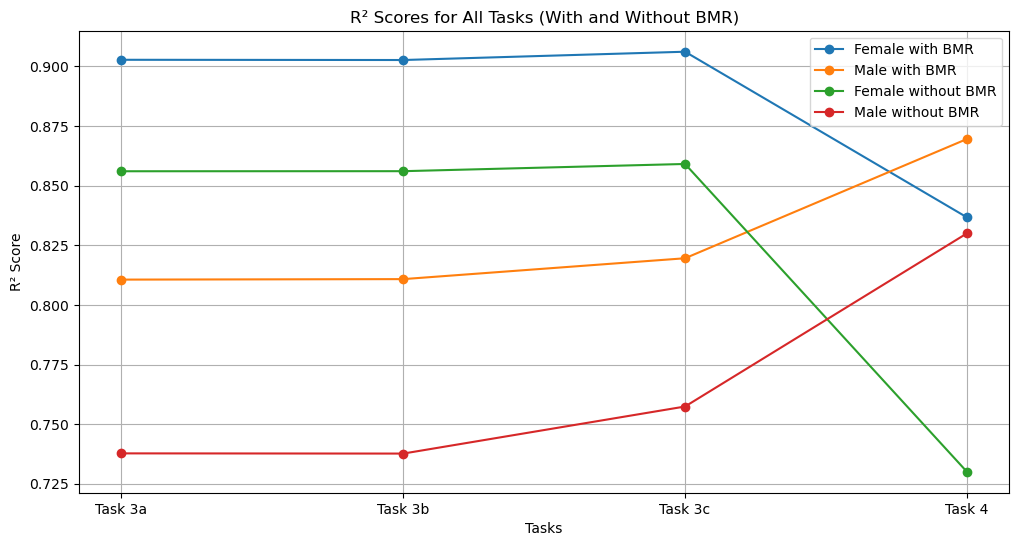

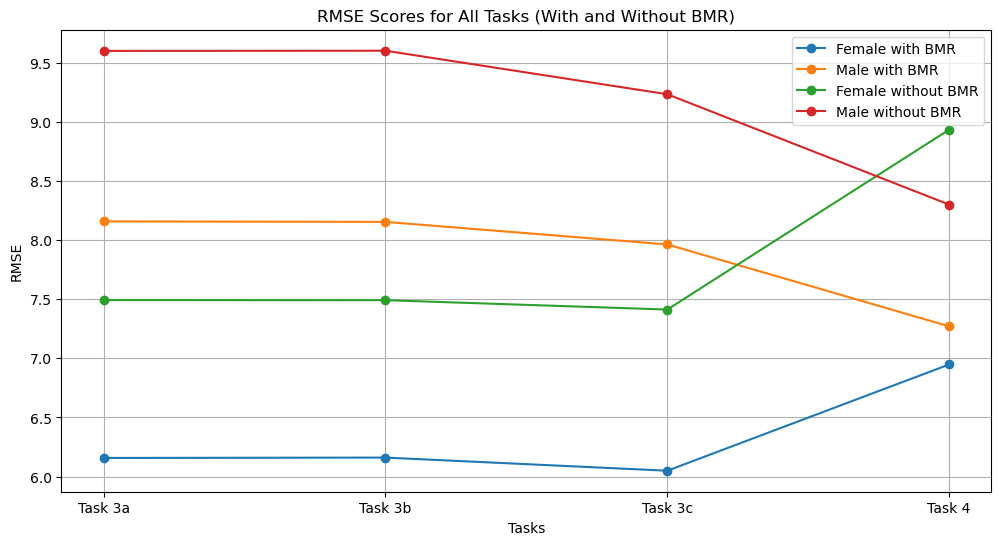

In [86]:
# Group data for all tasks
tasks = ['Task 3a', 'Task 3b', 'Task 3c', 'Task 4']

# R² scores
r2_female_with_BMR = [r2_f_3a_with_BMR, r2_f_3b_with_BMR, r2_f_3c_with_BMR, r2_4_with_BMR_f]
r2_male_with_BMR = [r2_m_3a_with_BMR, r2_m_3b_with_BMR, r2_m_3c_with_BMR, r2_4_with_BMR_m]
r2_female_without_BMR = [r2_f_3a_without_BMR, r2_f_3b_without_BMR, r2_f_3c_without_BMR, r2_4_without_BMR_f]
r2_male_without_BMR = [r2_m_3a_without_BMR, r2_m_3b_without_BMR, r2_m_3c_without_BMR, r2_4_without_BMR_m]

# RMSE scores
rmse_female_with_BMR = [rmse_f_3a_with_BMR, rmse_f_3b_with_BMR, rmse_f_3c_with_BMR, rmse_4_with_BMR_f]
rmse_male_with_BMR = [rmse_m_3a_with_BMR, rmse_m_3b_with_BMR, rmse_m_3c_with_BMR, rmse_4_with_BMR_m]
rmse_female_without_BMR = [rmse_f_3a_without_BMR, rmse_f_3b_without_BMR, rmse_f_3c_without_BMR, rmse_4_without_BMR_f]
rmse_male_without_BMR = [rmse_m_3a_without_BMR, rmse_m_3b_without_BMR, rmse_m_3c_without_BMR, rmse_4_without_BMR_m]

# Plotting R² scores for all tasks
plt.figure(figsize=(12, 6))
plt.plot(tasks, r2_female_with_BMR, marker='o', label='Female with BMR')
plt.plot(tasks, r2_male_with_BMR, marker='o', label='Male with BMR')
plt.plot(tasks, r2_female_without_BMR, marker='o', label='Female without BMR')
plt.plot(tasks, r2_male_without_BMR, marker='o', label='Male without BMR')
plt.title("R² Scores for All Tasks (With and Without BMR)")
plt.xlabel("Tasks")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()

# Plotting RMSE scores for all tasks
plt.figure(figsize=(12, 6))
plt.plot(tasks, rmse_female_with_BMR, marker='o', label='Female with BMR')
plt.plot(tasks, rmse_male_with_BMR, marker='o', label='Male with BMR')
plt.plot(tasks, rmse_female_without_BMR, marker='o', label='Female without BMR')
plt.plot(tasks, rmse_male_without_BMR, marker='o', label='Male without BMR')
plt.title("RMSE Scores for All Tasks (With and Without BMR)")
plt.xlabel("Tasks")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

Impact of BMR:

Across both genders, models that include BMR consistently show higher R² scores and lower RMSE compared to those without BMR. This confirms that BMR is a significant predictor of final weight, and excluding it reduces the predictive power of the models.
The improvement with BMR is especially pronounced for women, as seen by the sharper drop in R² and the increase in RMSE when BMR is excluded.

For men, the models perform relatively well even without BMR, especially in approaches like Task 4. This may suggest that the other features available (such as stress level, caloric surplus/deficit, and activity-related factors) are more effective for predicting male weight outcomes, even without BMR.
For women, the models without BMR experience a larger drop in performance, especially evident in Task 4, where the R² for women drops more significantly than for men.

Comparison Across Approaches:
    
    Approaches 3a, 3b, and 3c: The 'global approaches' are fairly consistent in their performance for both genders, with minor variations in R² and RMSE, suggesting that they are equally viable for predicting weight outcomes. Approach 3c (mini-batching) shows slightly better results, due to better convergence or reduced noise.
    
    Task 4: The models in Task 4 display generally lower R² and higher RMSE than those in Tasks 3a, 3b, and 3c, especially for women without BMR. This could indicate that Task 4, which might involve more extensive feature engineering or complexity, struggles to generalize as effectively when key features like BMR are missing.

# 6. Final discussion on the results

## The Importance of BMR
Including BMR significantly enhances model performance across both global and gender-specific models, supporting its role as a critical physiological feature linked to metabolism. This improvement is visible across R² and RMSE metrics, confirming that models are more accurate when BMR data is present.

Without BMR, the models rely on "Daily Calories Consumed" (DCC) as a substitute predictor, which has a high correlation with BMR. However, while DCC serves as a decent proxy, the new graphs illustrate that predictions are generally less precise without BMR, especially for female participants.

## Complexity of Prediction
The new results suggest that the dataset is well-suited to a straightforward linear model, as all methods yield similar results. This supports the idea that the relationships between features and the target variable are largely linear, allowing for effective prediction without complex modeling. Both Lasso and Ridge highlight caloric metrics as essential predictors when BMR is missing, further validating the adequacy of a linear approach.

## Model Selection Recommendation
The consistency in results across Tasks 3a, 3b, and 3c indicates that a simpler global model is effective. Mini-Batch Gradient Descent (Task 3c) is slightly preferred for its balance of efficiency and stability. Task 4's gender-specific models are valuable for understanding gender-based nuances but show more variability, suggesting that these models may be more sensitive to feature inclusion, such as BMR, and therefore less generalizable when key information is missing.